In [1]:
# the following are the important Package used for this EDA process

import numpy as np 
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib as matplot
%matplotlib inline
sns.set_style('whitegrid')
# Input data files are available in the "../Data/" directory.
import os

 ## Importing The Dataset

In [2]:
application_train = pd.read_csv('Data/application_train.csv')
bureau = pd.read_csv('Data/bureau.csv')
bureau_balance = pd.read_csv('Data/bureau_balance.csv')
POS_CASH_balance = pd.read_csv('Data/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('Data/credit_card_balance.csv')
previous_application = pd.read_csv('Data/previous_application.csv')
installments_payments = pd.read_csv('Data/installments_payments.csv')

## Data Description

appliction_train 

This is the main table, contain Target feature.
Static data for all applications. One row represents one loan in our data sample.

bureau

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

bureau_balance

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

POS_CASH_balance

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

credit_card_balance

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

previous_application

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

installments_payments

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.



# EDA


# i.Applaication Train DataSet

#### Number of records and Features in the datasets


In [3]:
print("The number of Features in application train dataset :",application_train.shape[1])
print("The number of Rows in application Train dataset :",application_train.shape[0])

The number of Features in application train dataset : 122
The number of Rows in application Train dataset : 307511


In [4]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

#### Identifying Numerical and Categorical Features

In [5]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


###  Function for  find out Numerical and categeical Variables

In [6]:
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print('-----'*40)
    print("numerical_features:",numerical_features)
    


In [7]:
type_features(application_train)

categorical_features : Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_

### Identifying Missing Value Present in Application Train Dataset

In [8]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.shape[0] * 100).sort_values(ascending=False)
    ms = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms = ms[ms["Percent"] > 0]

    plt.figure(figsize=(15, 10))
    sns.barplot(x=ms.index, y=ms["Percent"], color="green", alpha=0.8)
    plt.xticks(rotation=90)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    plt.tight_layout()
    plt.show()

    return ms

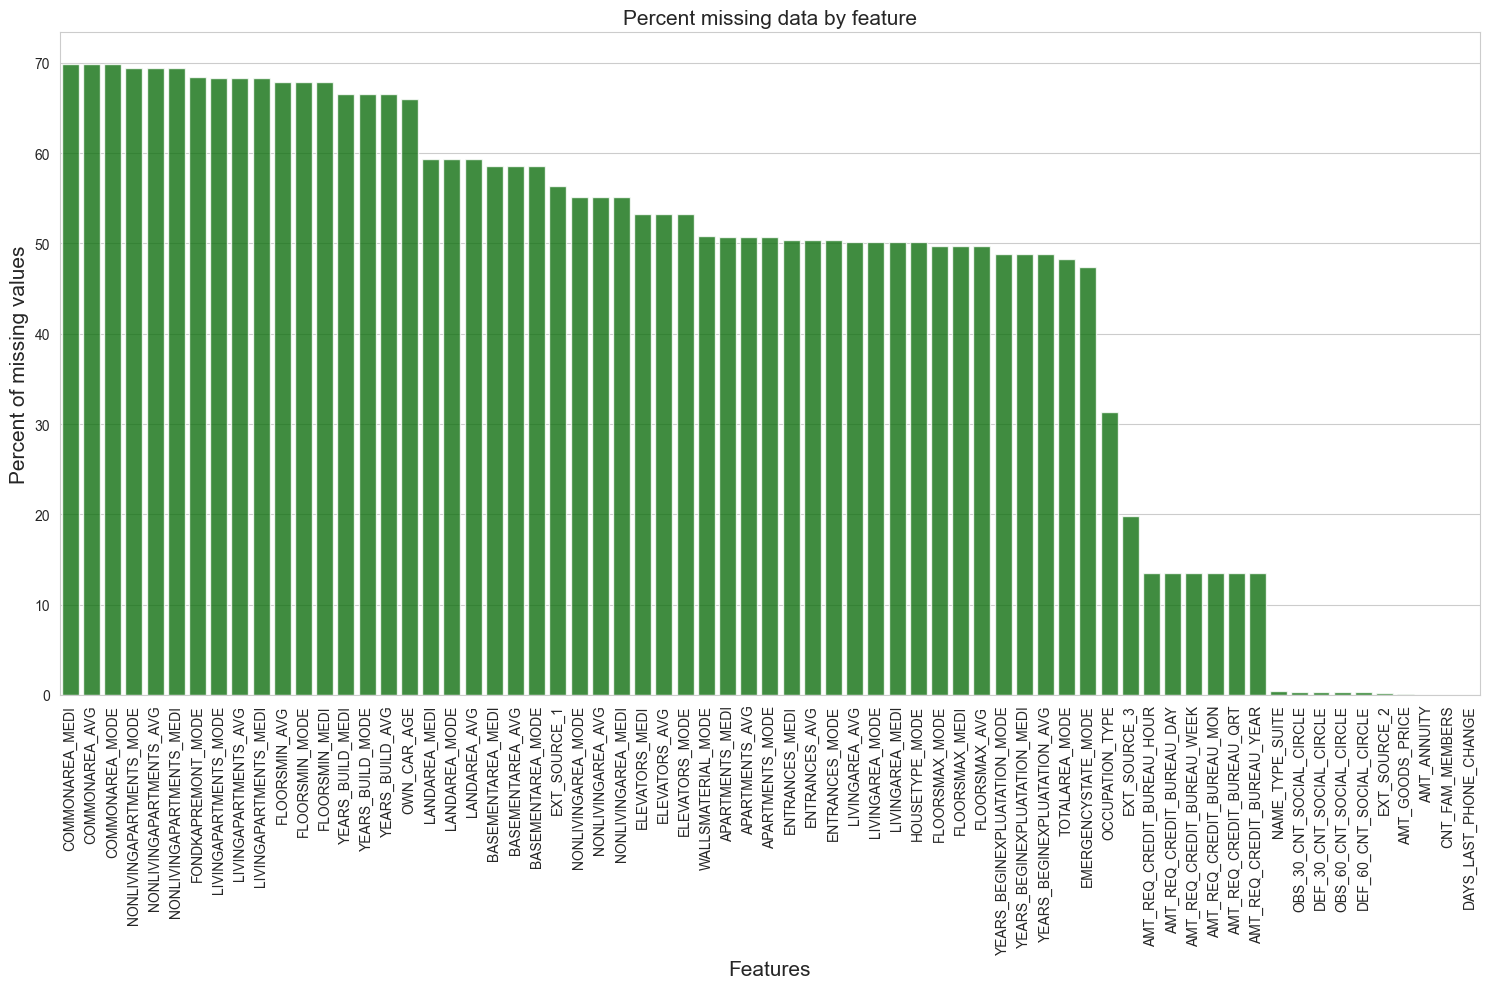

Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
...                          ...        ...
EXT_SOURCE_2                 660   0.214626
AMT_GOODS_PRICE              278   0.090403
AMT_ANNUITY                   12   0.003902
CNT_FAM_MEMBERS                2   0.000650
DAYS_LAST_PHONE_CHANGE         1   0.000325

[67 rows x 2 columns]

In [9]:
missingdata(application_train)

# Observation 
- The above given figure which clear say about the which features has missing value and precentage of missing value avaiable in application_train DataSet
- There are 121 features and 307511 rows in application train dataset
- The dataset contains 65 columns with float64 data type, 41 columns with int64 data type, and 16 columns with object data type.
- Missing persent greater than 50 perceent columns are droped

# ii.bureau dataset

In [10]:
bureau.head(6)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   
5      215354       5714467        Active      currency 1         -273   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   
5                   0              27460.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   
5                     0.0                   0        180000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                 0.00                   NaN                     0.0   
1            171342.00                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   
5             71017.38             108982.62                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN  
5      Credit card                 -31          NaN

In [11]:
print("The number of features is :",bureau.shape[1],"The number of row is:",bureau.shape[0])

The number of features is : 17 The number of row is: 1716428


#### identifying the catergical and numnerical features  

In [12]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [13]:
type_features(bureau)

categorical_features : Index(['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')


#### identying the missing data

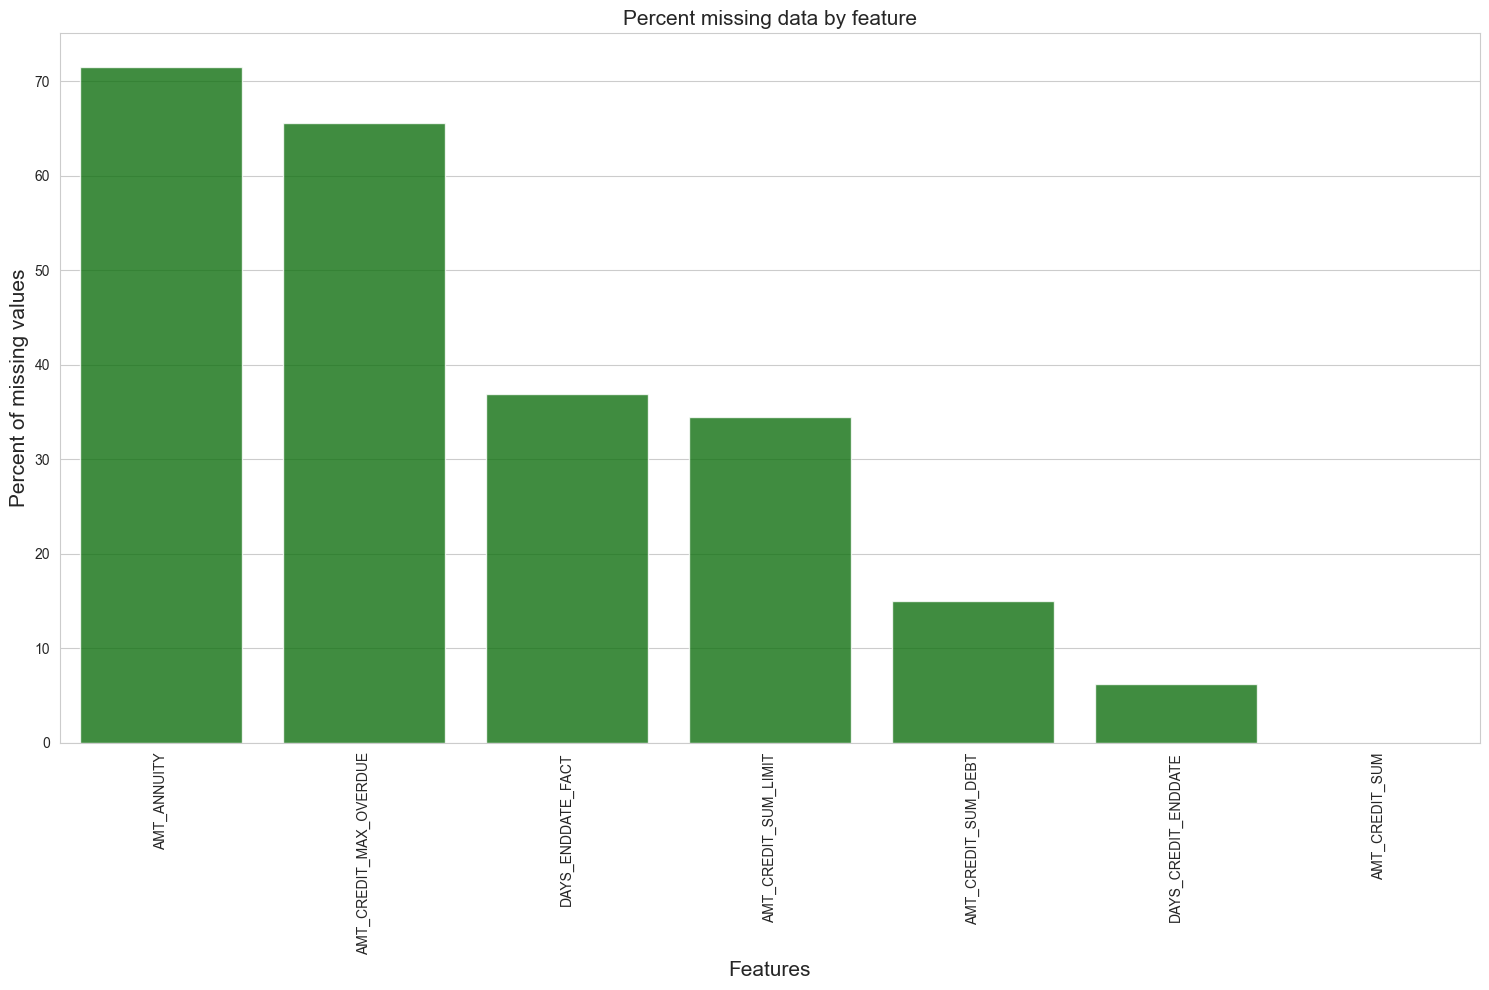

Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264
DAYS_ENDDATE_FACT        633653  36.916958
AMT_CREDIT_SUM_LIMIT     591780  34.477415
AMT_CREDIT_SUM_DEBT      257669  15.011932
DAYS_CREDIT_ENDDATE      105553   6.149573
AMT_CREDIT_SUM               13   0.000757

In [14]:
missingdata(bureau)

# Observation
- There are 17 features and 1716428 rows in bureau dataset
- The dataset contains 8 columns with float64 data type, 6 columns with int64 data type, and 3 columns with object data type.
- The columns AMT_ANNUITY, AMT_CREDIT_MAX_OVERDUE contain more than 50% missing value so they need to removed


# iii. bureau_balance DataSet

In [15]:
bureau_balance.head(7)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C
5       5715448              -5      C
6       5715448              -6      C

In [16]:
print("the number of columns",bureau_balance.shape[1],"the number of rows :",bureau_balance.shape[0])

the number of columns 3 the number of rows : 27299925


## identifying Catergical and numerical variables

In [17]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [18]:
type_features(bureau_balance)

categorical_features : Index(['STATUS'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_BUREAU', 'MONTHS_BALANCE'], dtype='object')


### identifying the missing value in bureau_balance

In [19]:
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
ms= ms[ms["Percent"] > 0]
ms

Empty DataFrame
Columns: [Total, Percent]
Index: []

# Observation
- There are 3 features and 27299924 rows in bureau_balance dataset
- The dataset contains 2 columns with int64 data type, and 1 columns with object data type.
- No missing data in Bureau Balance Dataset


# iv. POS_CASH_balance DataSet

In [20]:
POS_CASH_balance.head(6)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   
5     2207092      342166             -32            12.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0  
5                   12.0               Active       0           0

In [21]:
POS_CASH_balance.shape

(10001358, 8)

### identifying the Catergical and numerical variables 

In [22]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [23]:
type_features(POS_CASH_balance)

categorical_features : Index(['NAME_CONTRACT_STATUS'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')


### identifying the missing values

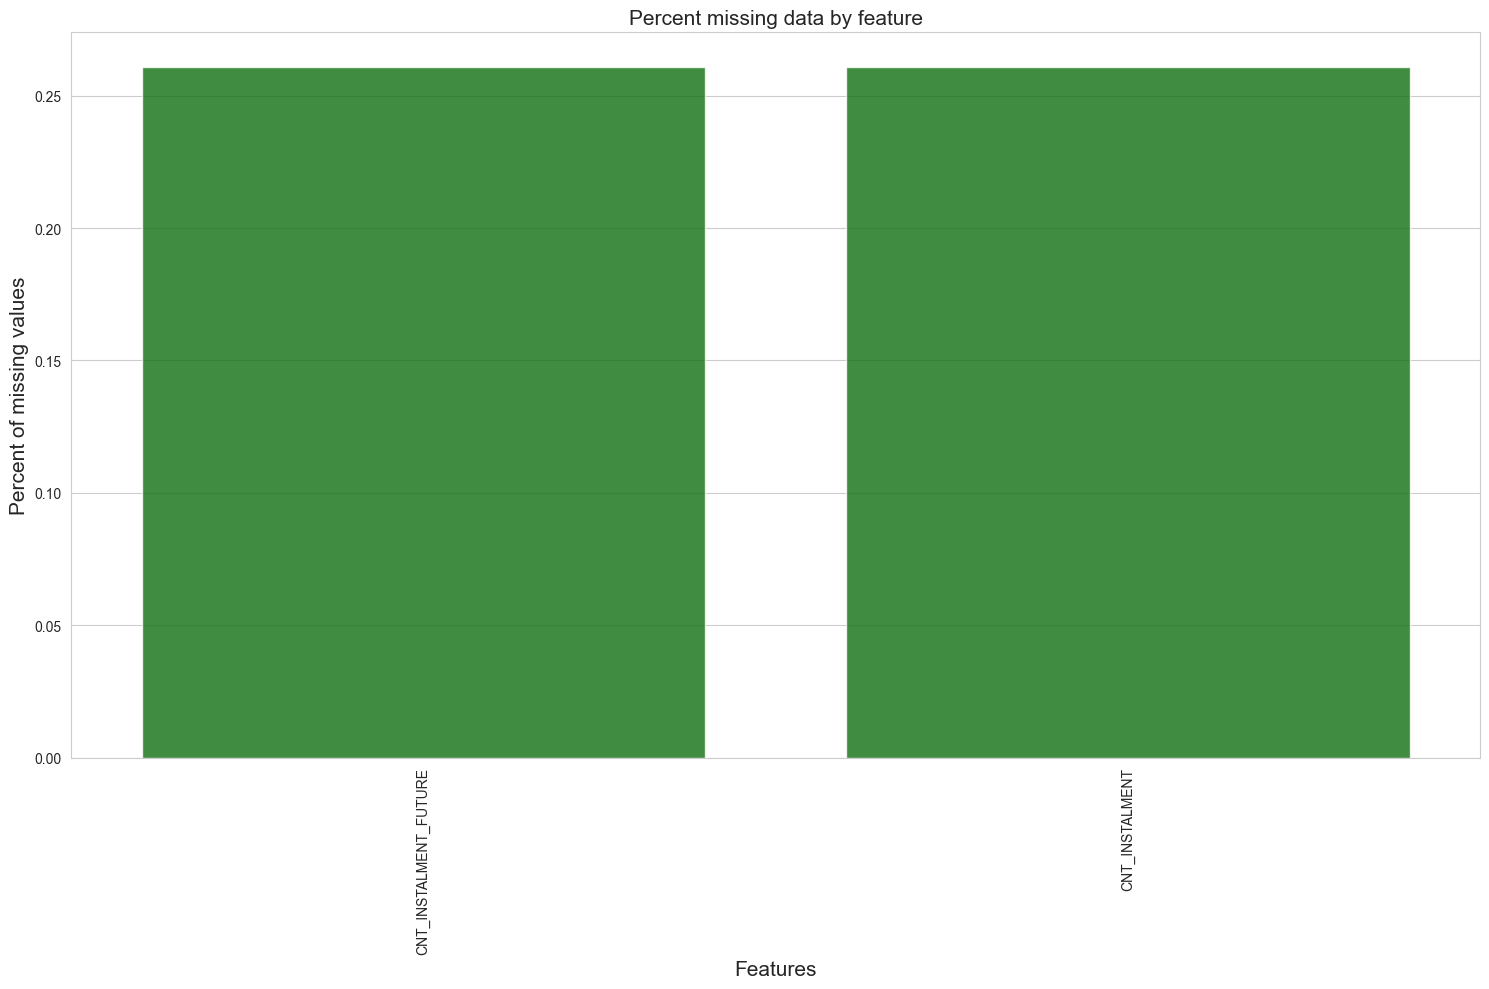

Total   Percent
CNT_INSTALMENT_FUTURE  26087  0.260835
CNT_INSTALMENT         26071  0.260675

In [24]:
missingdata(POS_CASH_balance)

# Observation
- there are 8 fetures and 10001358 rows in POS_CASH_balance dataset
- The dataset contains 2 columns with float64 data type, 5 columns with int64 data type, and 1 columns with object data type.
- two columns contain 0.25% percent of missing values

# v. credit_card_balance dataset

In [25]:
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [26]:
print("the number columns in dataset:",credit_card_balance.shape[1],"The number of rows:",credit_card_balance.shape[0])

the number columns in dataset: 23 The number of rows: 3840312


### identifying the Categerical and numerical Variable 

In [27]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [28]:
type_features(credit_card_balance)

categorical_features : Index(['NAME_CONTRACT_STATUS'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')


### identifying the missing value in credit_card_balance dataset

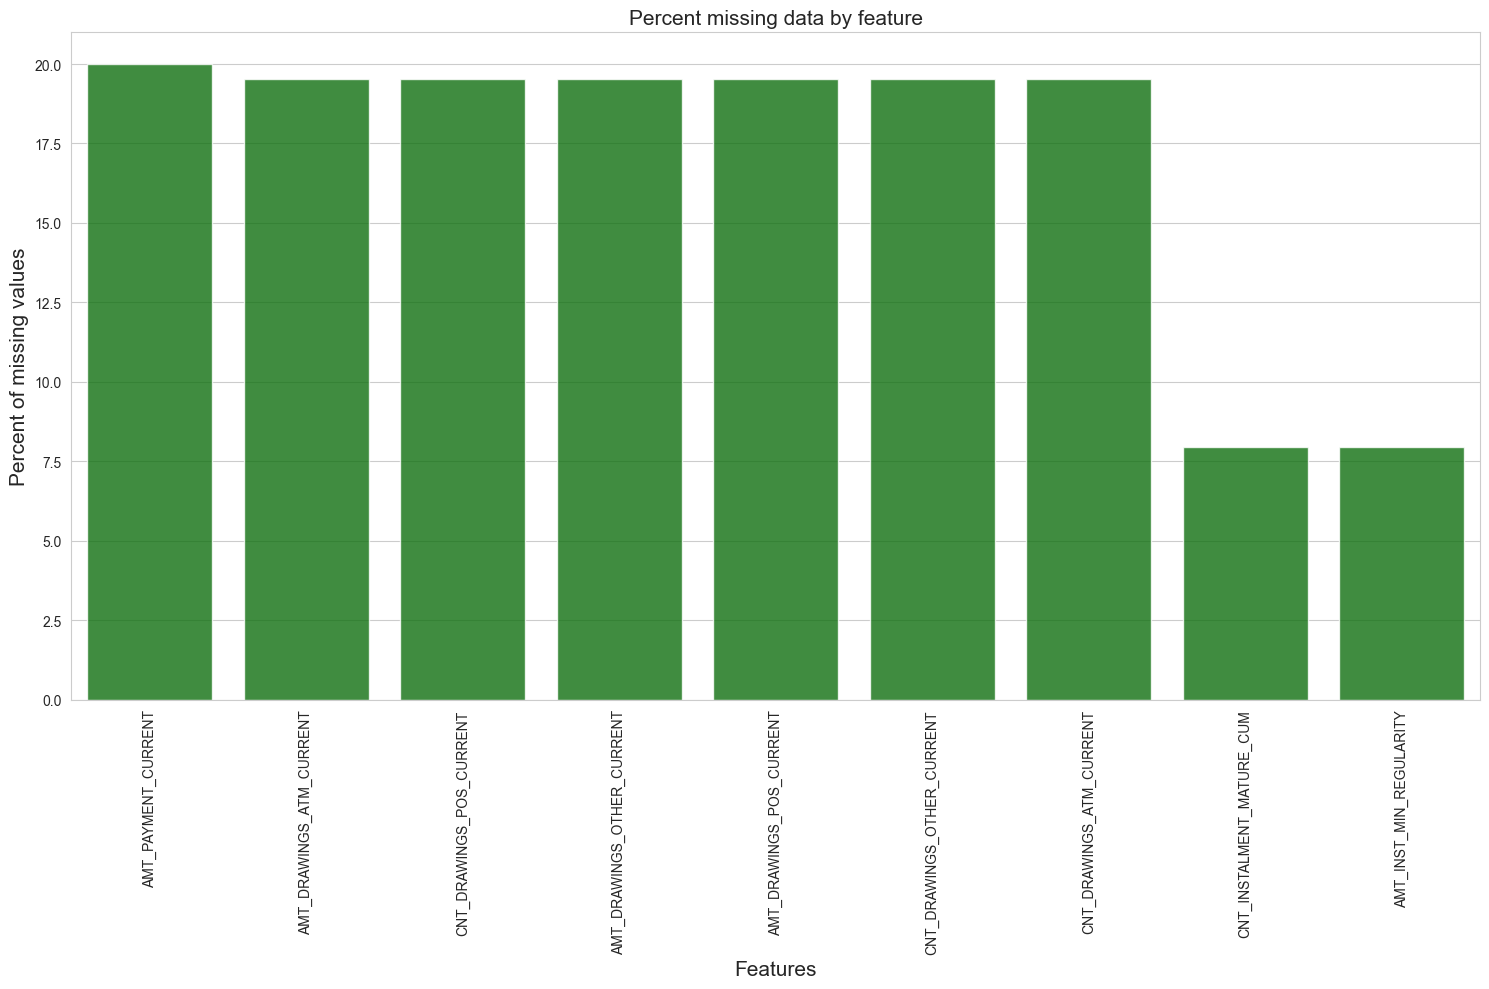

Total    Percent
AMT_PAYMENT_CURRENT         767988  19.998063
AMT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_DRAWINGS_POS_CURRENT    749816  19.524872
AMT_DRAWINGS_OTHER_CURRENT  749816  19.524872
AMT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_INSTALMENT_MATURE_CUM   305236   7.948208
AMT_INST_MIN_REGULARITY     305236   7.948208

In [29]:
missingdata(credit_card_balance)

# observation
- there are 23 features and 3840312 rows in credit_card_balance datset
- The dataset contains 15 columns with float64 data type, 7 columns with int64 data type, and 1 columns with object data type.

# vi. previous_application Dataset

In [30]:
previous_application.head(7)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   
5                        8  ...                  XNA         18.0   
6                       11  ...                  XNA          NaN   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   
5        low_normal          Cash X-Sell: low            365243.0   
6               XNA                      Cash                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   
5         -654.0                    -144.0         -144.0           -137.0   
6            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  
5                       1.0  
6                       NaN  

[7 rows x 37 columns]

 ### identifying the catergical and numerical variable in previous application Data set.

In [31]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [32]:
type_features(previous_application)

categorical_features : Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYME

### identifying the missing value in previous_application

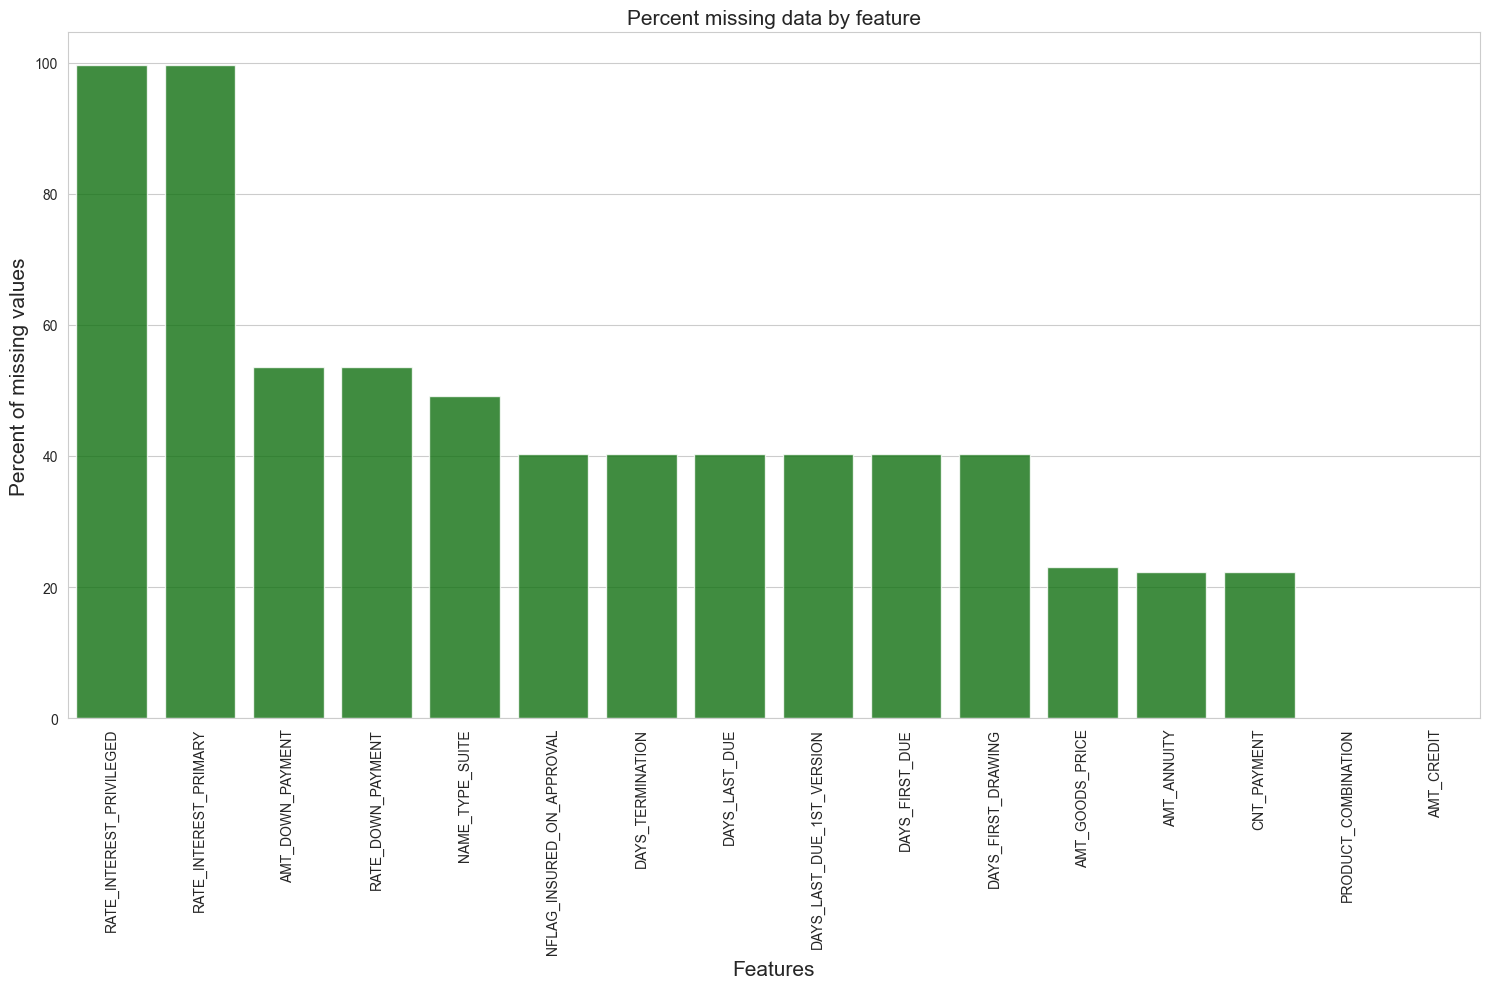

Total    Percent
RATE_INTEREST_PRIVILEGED   1664263  99.643698
RATE_INTEREST_PRIMARY      1664263  99.643698
AMT_DOWN_PAYMENT            895844  53.636480
RATE_DOWN_PAYMENT           895844  53.636480
NAME_TYPE_SUITE             820405  49.119754
NFLAG_INSURED_ON_APPROVAL   673065  40.298129
DAYS_TERMINATION            673065  40.298129
DAYS_LAST_DUE               673065  40.298129
DAYS_LAST_DUE_1ST_VERSION   673065  40.298129
DAYS_FIRST_DUE              673065  40.298129
DAYS_FIRST_DRAWING          673065  40.298129
AMT_GOODS_PRICE             385515  23.081773
AMT_ANNUITY                 372235  22.286665
CNT_PAYMENT                 372230  22.286366
PRODUCT_COMBINATION            346   0.020716
AMT_CREDIT                       1   0.000060

In [33]:
missingdata(previous_application)

# observation
- there are 37 features and 1670213 rows in previous_application dataset
- The dataset contains 15 columns with float64 data type, 6 columns with int64 data type, and 16 columns with object data type.
- The feature RATE_INTEREST_PRIVILEGED and RATE_INTEREST_PRIMARY having 99% missing value so this columns are removed.
- AMT_DOWN_PAYMENT, RATE_DOWN_PAYMENT and NAME_TYPE_SUITE  fetures having more than 50 % missing values so these fetures also removed.

# vii.installments_payments dataset

In [34]:
installments_payments.head(7)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   
5     1137312      164489                     1.0                     12   
6     2234264      184693                     4.0                     11   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585  
5          -1384.0             -1417.0        5970.375     5970.375  
6           -349.0              -352.0       29432.295    29432.295

### identifying the categerical and numerical Variable 

In [35]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [36]:
type_features(installments_payments)

categorical_features : Index([], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')


### identifying the missing value in installments_payments

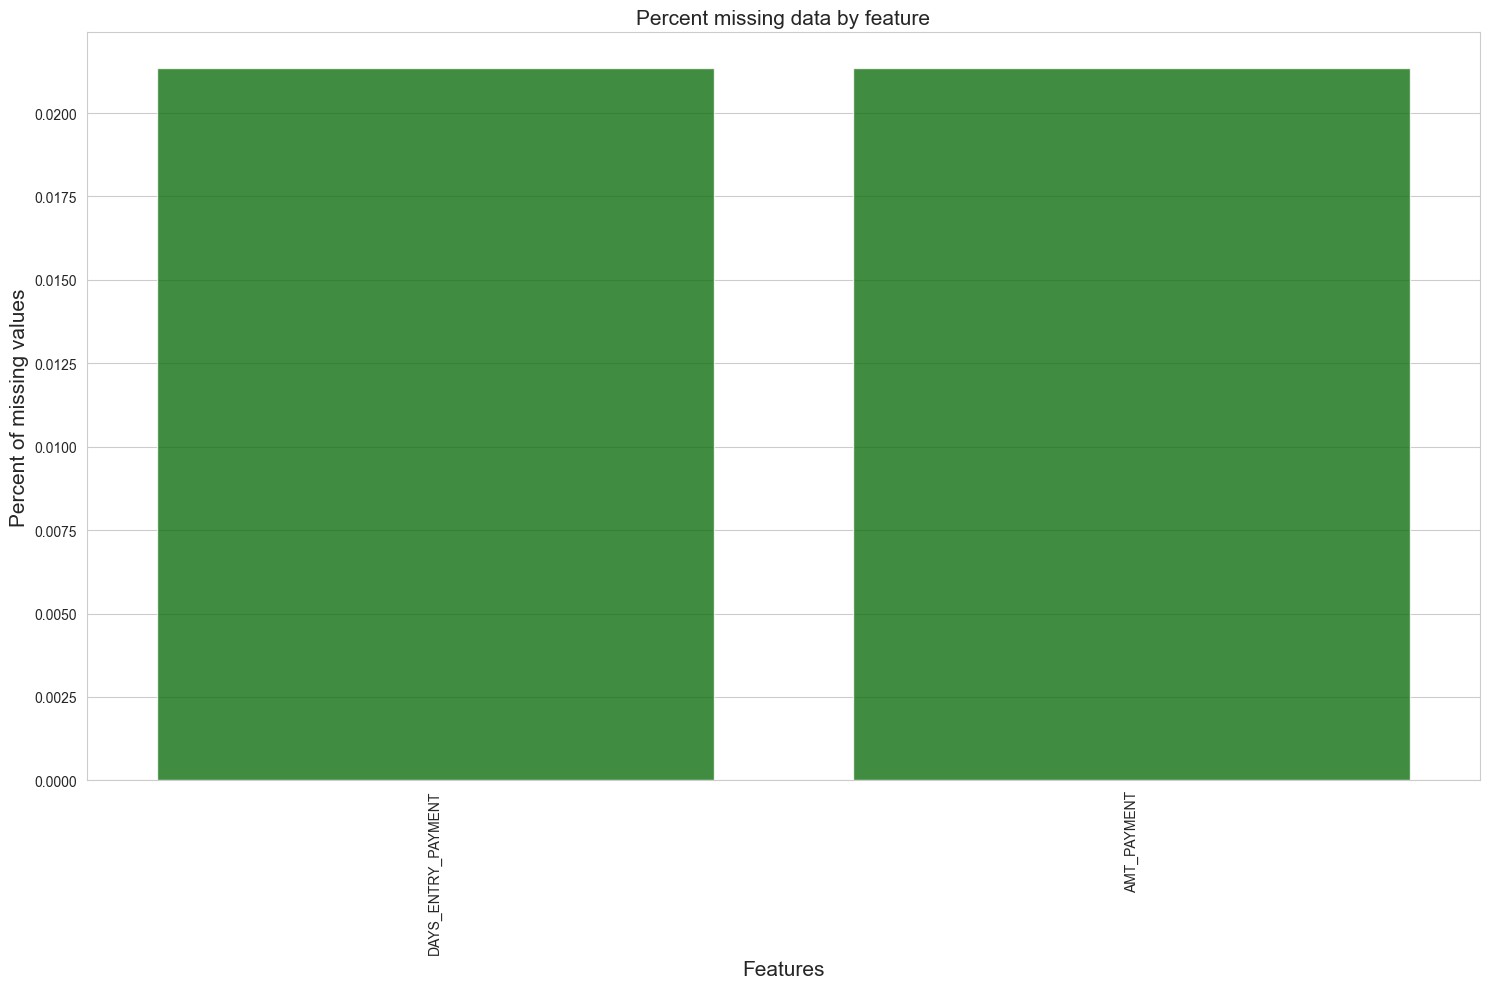

Total   Percent
DAYS_ENTRY_PAYMENT   2905  0.021352
AMT_PAYMENT          2905  0.021352

In [37]:
missingdata(installments_payments)

# Observation
- There are 8 columns and 13605400 rows in installments_payments dataset.
- The dataset contains 5 columns with float64 data type and 3 columns with int64 data type.
- It contain only 0.02 % of missing value so it can be imputed

## Checking the Imbalance of Target Variable

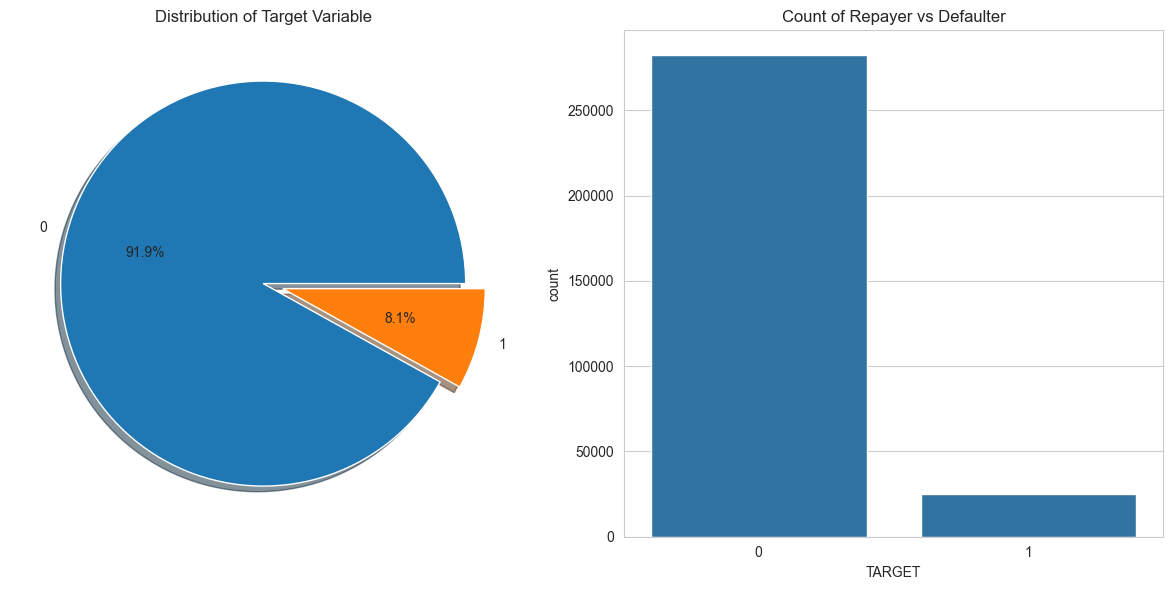

In [38]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
application_train.TARGET.value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Distribution of Target Variable')
ax[0].set_ylabel('')

# Bar chart
sns.countplot(x='TARGET', data=application_train, ax=ax[1])
ax[1].set_title('Count of Repayer vs Defaulter')

plt.tight_layout()
plt.show()


# Observation
It is evident that  many customer are able to pay the loan back i.e Only 91.9% of the total customer are repaying the loan.
We need to drill down more to get better insights from the data and see which categories of the customer are not able to pay back loan.

We will try to check the repayer and defualter rate by using the different features of the dataset. 
Some of the features being Gender,Education,Employment_type,etc. First let us understand the different types of features.

### Analysing The Features


### i.Eduaction-----> Categorical Feature

In [39]:
def group_by(df,t1='',t2=''):
    a1=df.groupby([t1,t2])[t2].count()
    return a1

In [40]:
def plot_re(df,t1='',t2=''):
    f,ax=plt.subplots(1,2,figsize=(10,6))
    df[[t1,t2]].groupby([t1]).count().plot.bar(ax=ax[0],color='Green')
    ax[0].set_title('count of customer Based on'+t1)
    sns.countplot(x=t1,hue=t2,data=df,ax=ax[1],palette="spring")
    ax[1].set_title(t1+': Repayer vs Defualter')
    # Rotate x-labels
    plt.xticks(rotation=-90)
    a=plt.show()
    return a

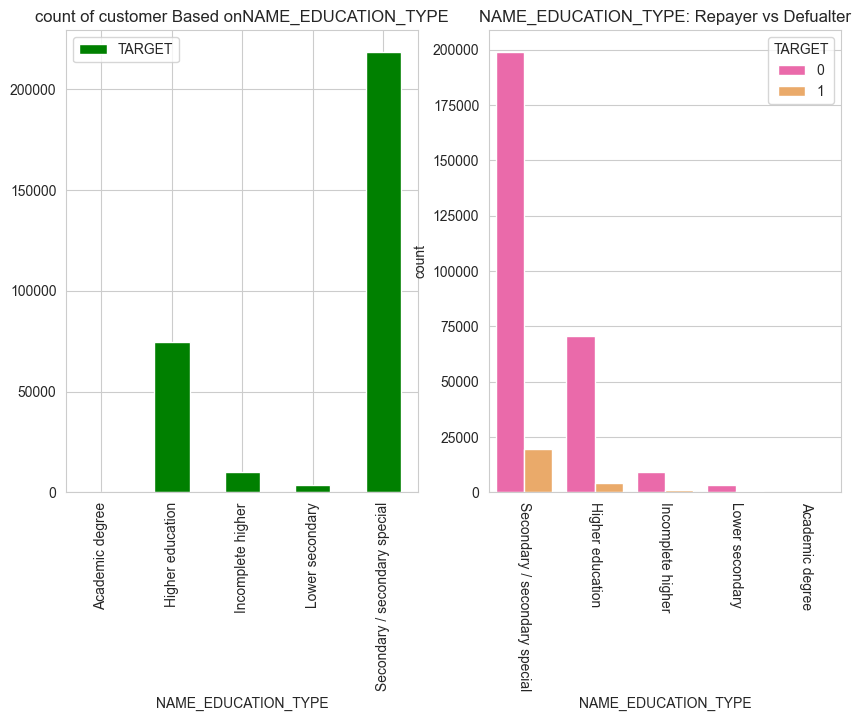

In [41]:
plot_re(application_train,'NAME_EDUCATION_TYPE','TARGET')

# Observation
the proof is  edvined by looking at the above given plot and groupby function is clearly customer with education of secondary/secondary special has high  count where not able to pay loan back.

### ii. Analysis based on Code  Gender 

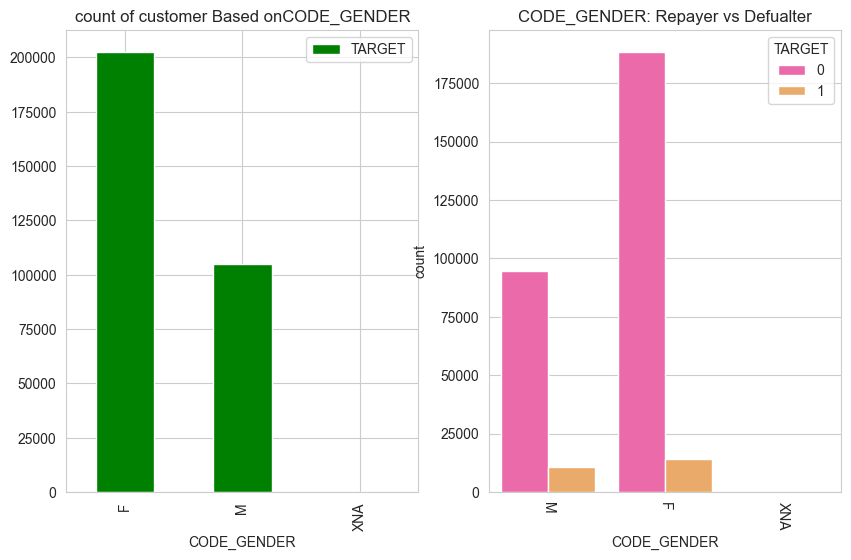

In [42]:
plot_re(application_train,'CODE_GENDER','TARGET')

# Observation 
its clear that  by looking at the above given plot and groupby function is clearly customer based on code gender type female  has high  count where not able to pay loan back compare to male.

#### iii.Analysis based on INCOME TYPE

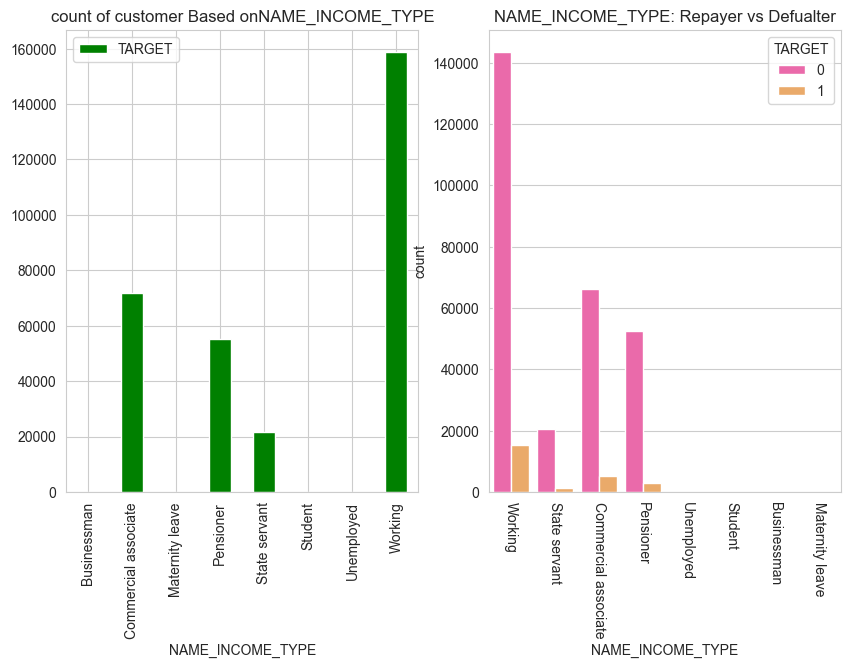

In [43]:
plot_re(application_train,'NAME_INCOME_TYPE','TARGET')

# Observation
its clear that  by looking at the above given plot and groupby function is clearly customer based on code income type and the working  has high  count where not able to pay loan back compare to all other

#### iv. Analysis based on OCCUPATION TYPE

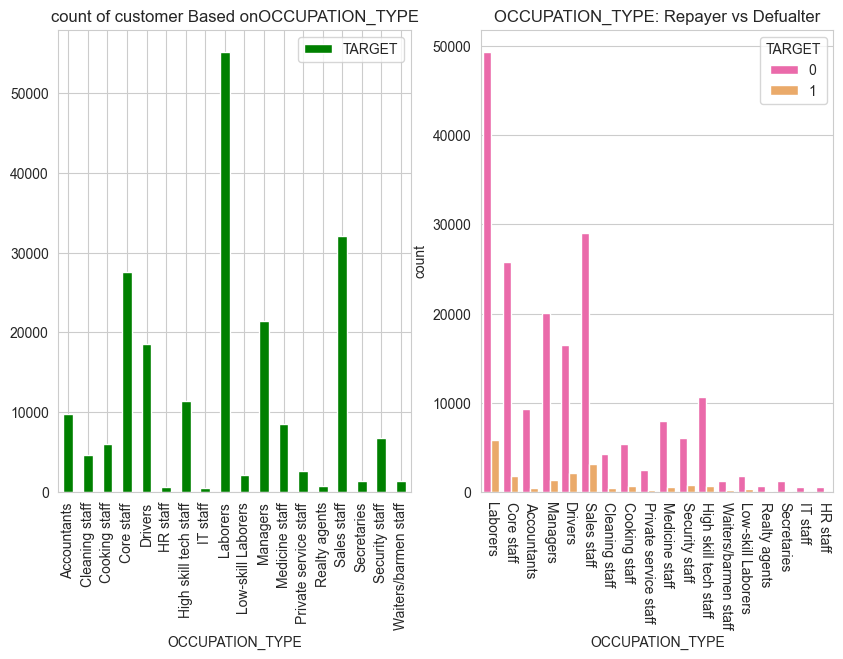

In [44]:
plot_re(application_train,'OCCUPATION_TYPE','TARGET')

# Observation
its clear that  by looking at the above given plot and groupby function is clearly customer based on occupation  type. the laborers has high  count where not able to pay loan back compare to all other.

#### v. Analysis Based on FAMILY STATUS

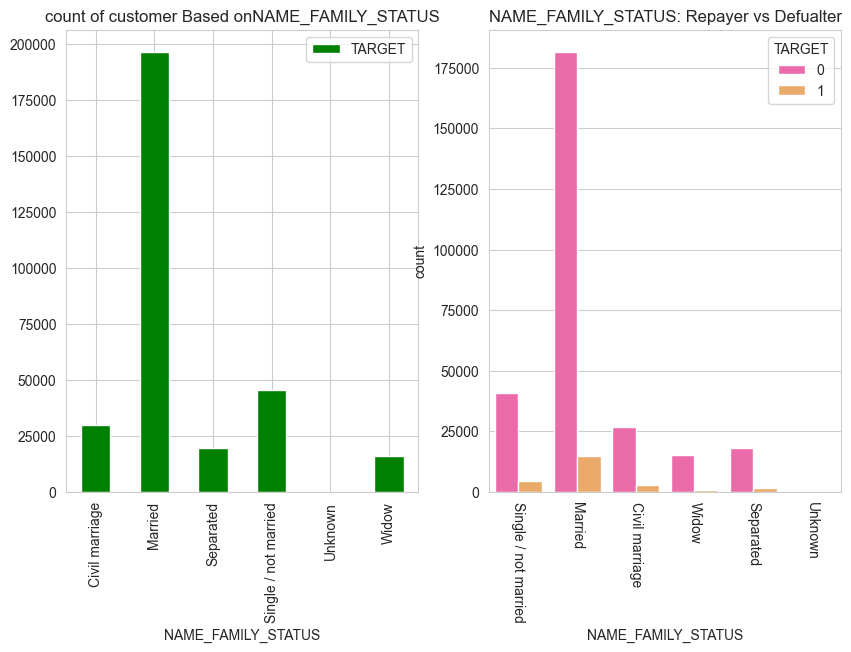

In [45]:
plot_re(application_train,'NAME_FAMILY_STATUS','TARGET')

# Observation
its clear that  by looking at the above given plot and groupby function is clearly customer based on code Family type and the Married customer  has high  count where not able to pay loan back compare to all other.


#### vi. Analysis based HOUSING TYPE

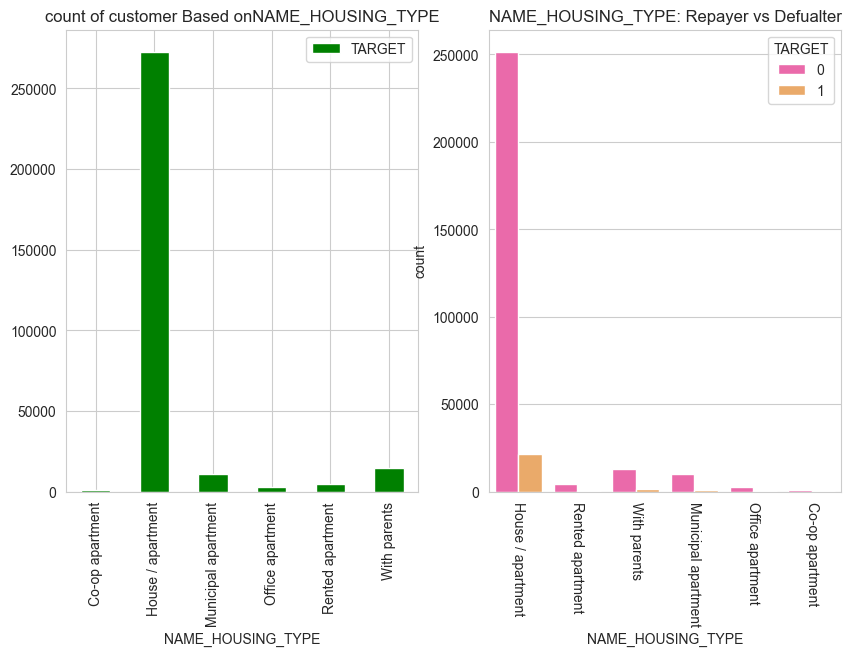

In [46]:
plot_re(application_train,'NAME_HOUSING_TYPE','TARGET')

# Observation
its clear that  by looking at the above given plot and groupby function is clearly customer based on Housing type and the house type customer  has high  count where not able to pay loan back compare to all other.

#### vii. Analysis based on TYPE SUITE

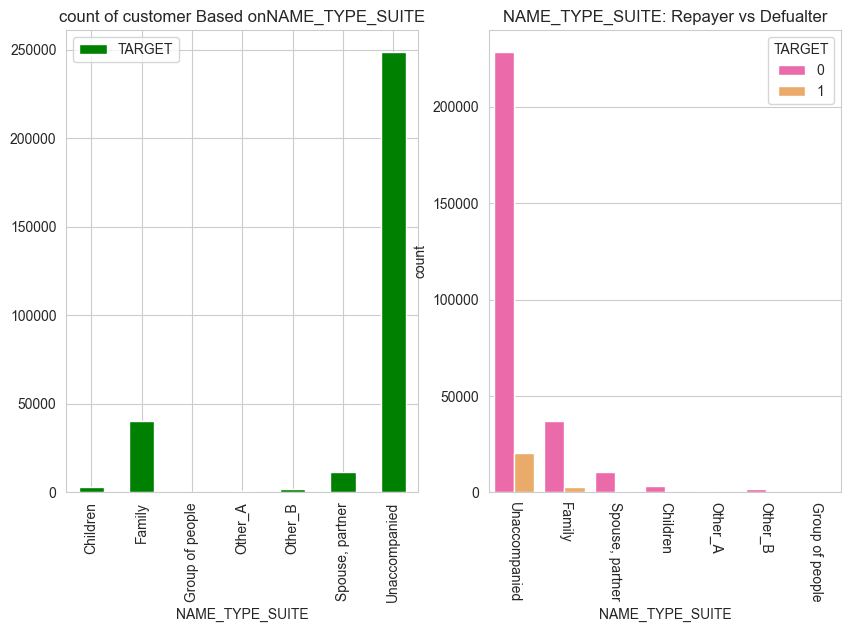

In [47]:
plot_re(application_train,'NAME_TYPE_SUITE','TARGET')

# Observation
its clear that  by looking at the above given plot and groupby function is clearly customer based on Suite type and the unaccompanied customer  has high  count where not able to pay loan back compare to all other.

#### viii. Analysis Based on ORGANIZATION TYPE

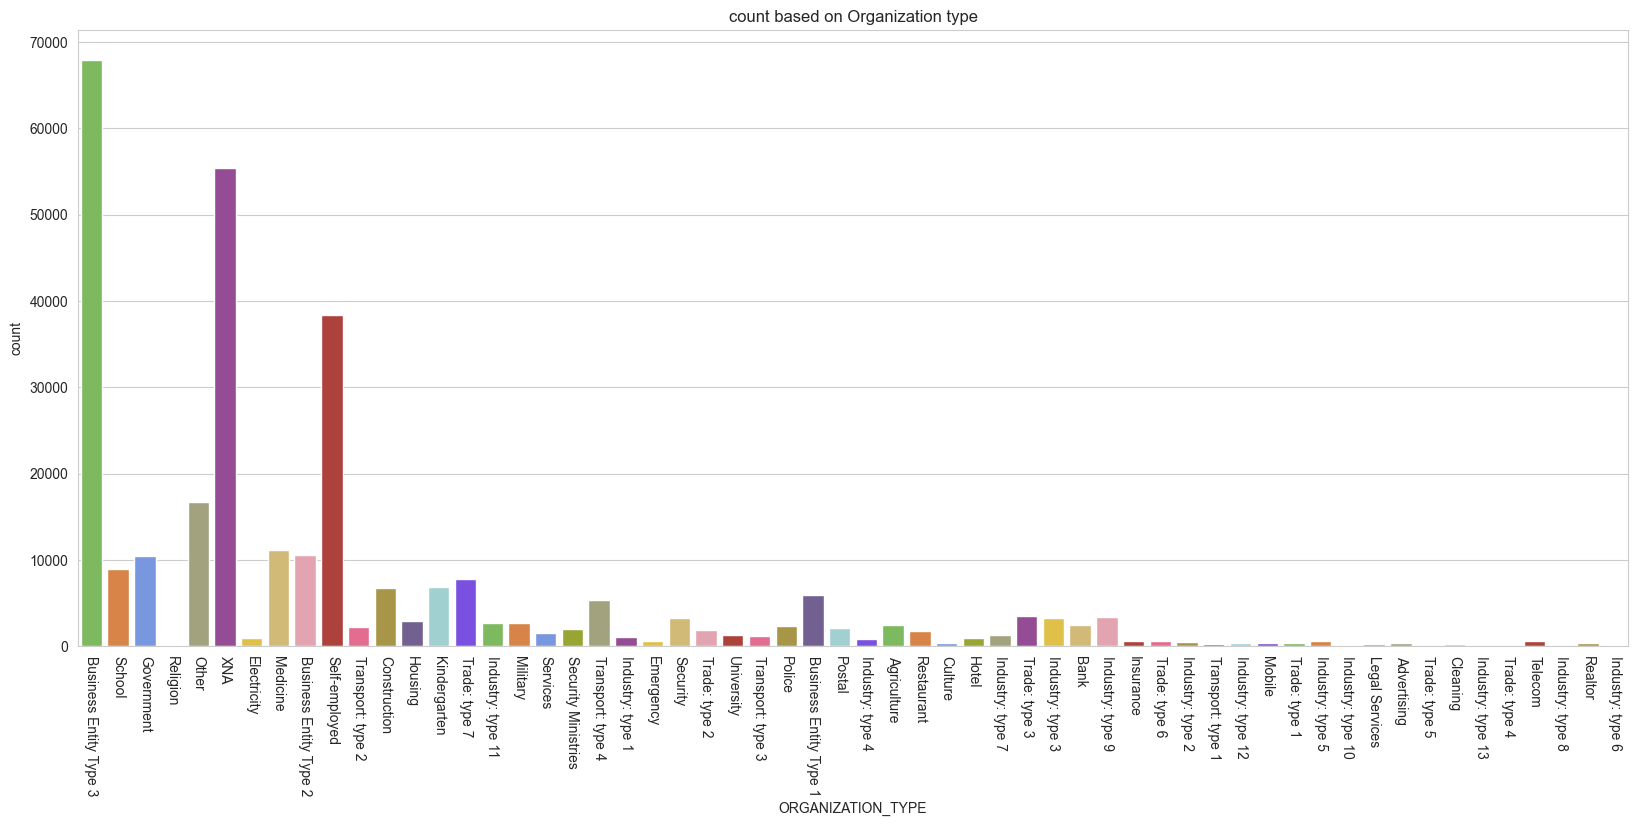

In [48]:
f, ax = plt.subplots(figsize=(20, 8))
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='ORGANIZATION_TYPE', data=application_train, palette=color_types).set_title('count based on Organization type');
 
# Rotate x-labels
plt.xticks(rotation=-90)
plt.show()

Text(0.5, 1.0, 'REpayer VS Defaulter based on Organization type')

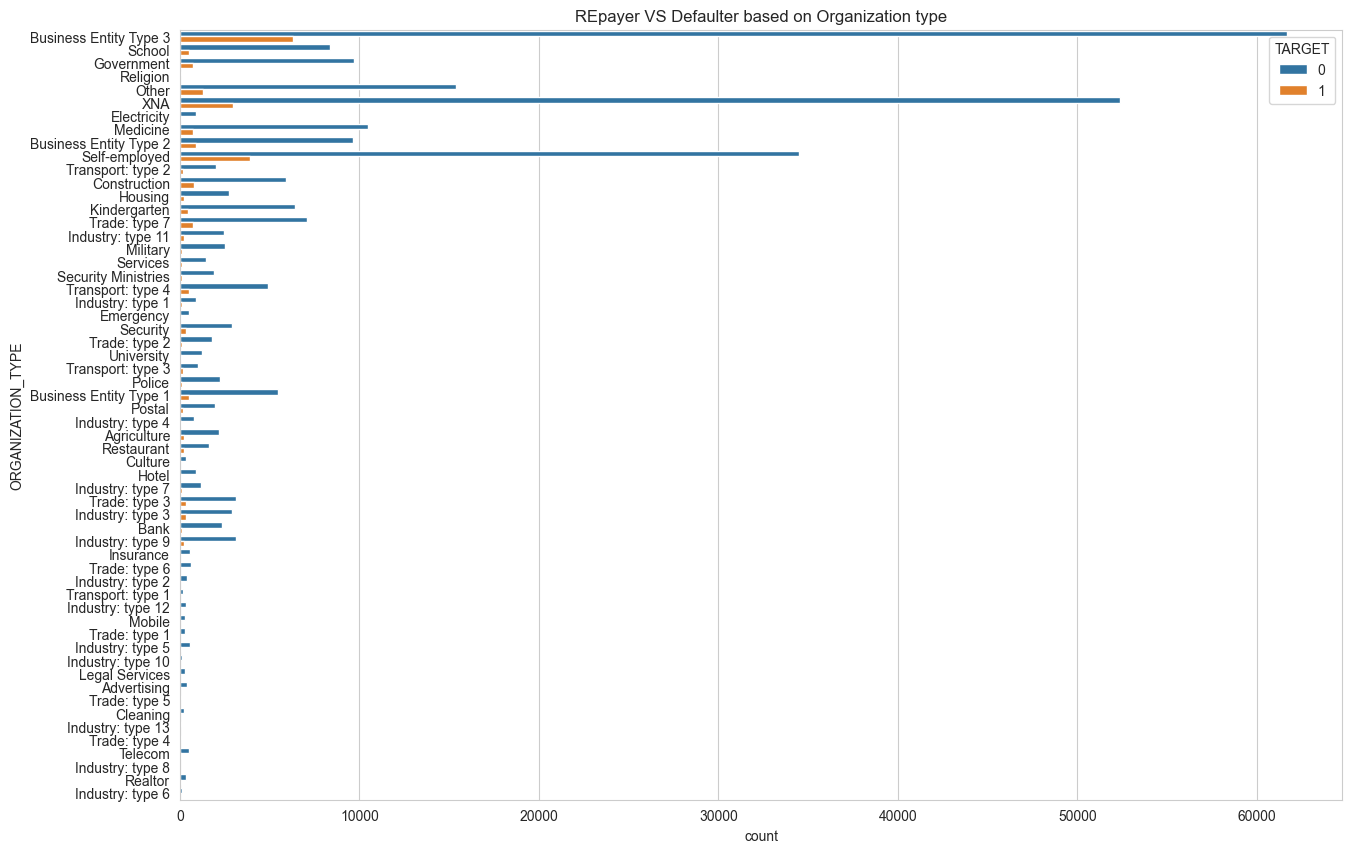

In [49]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="ORGANIZATION_TYPE", hue='TARGET', 
              data=application_train).set_title('REpayer VS Defaulter based on Organization type')

# Observation
its clear that  by looking at the above given plot and groupby function is clearly customer based on Organization type and the Business type 3 customer  has high  count where not able to pay loan back compare to all other.

#### ix. Analysis based on FLAG OWN CAR

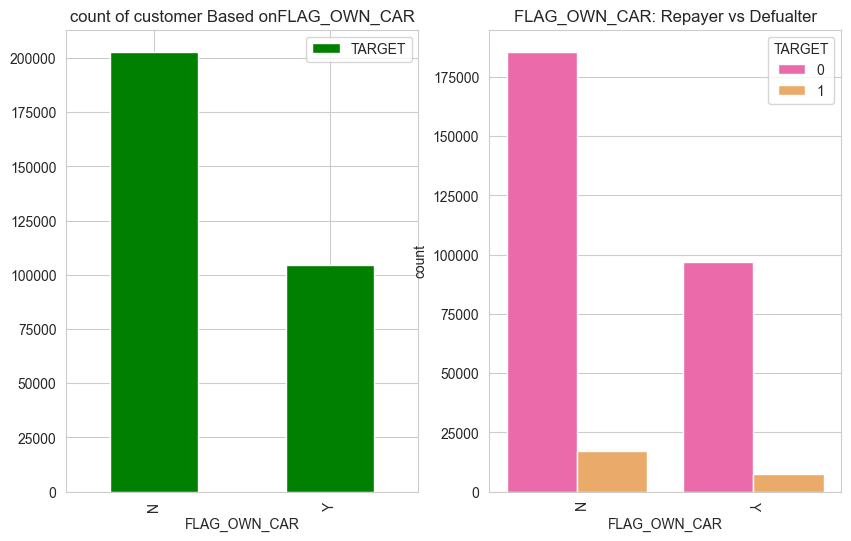

In [50]:
plot_re(application_train,'FLAG_OWN_CAR','TARGET')

# Observation
its clear that  by looking at the above given plot and groupby function is clearly customer based on owning car type and the customer with no car  has high  count where not able to pay loan back compare to all other.

#### x. Analysis based on FLAG_OWN_REALTY

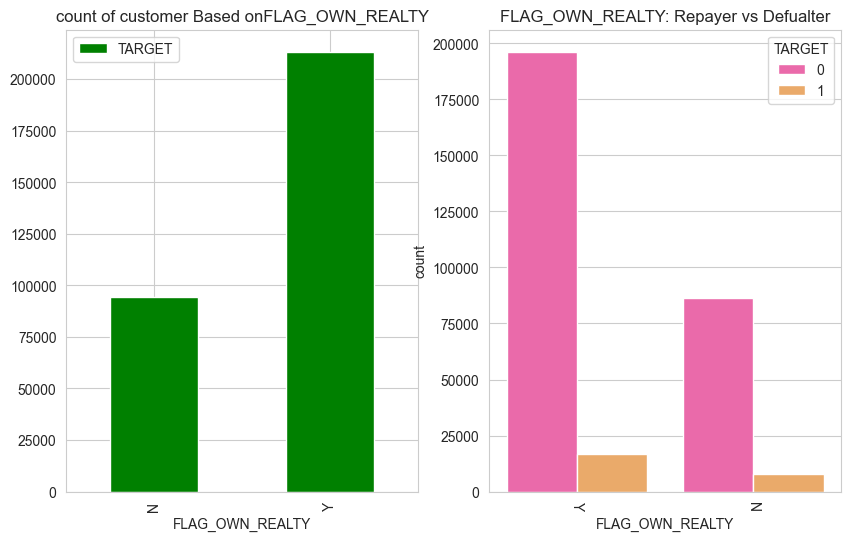

In [51]:
plot_re(application_train,'FLAG_OWN_REALTY','TARGET')

# Observation
its clear that  by looking at the above given plot and groupby function is clearly customer based on owning Reality type and the customer has Reality  has high  count where not able to pay loan back compare to all other.

#### xi. Analysis based on NAME_CONTRACT_TYPE

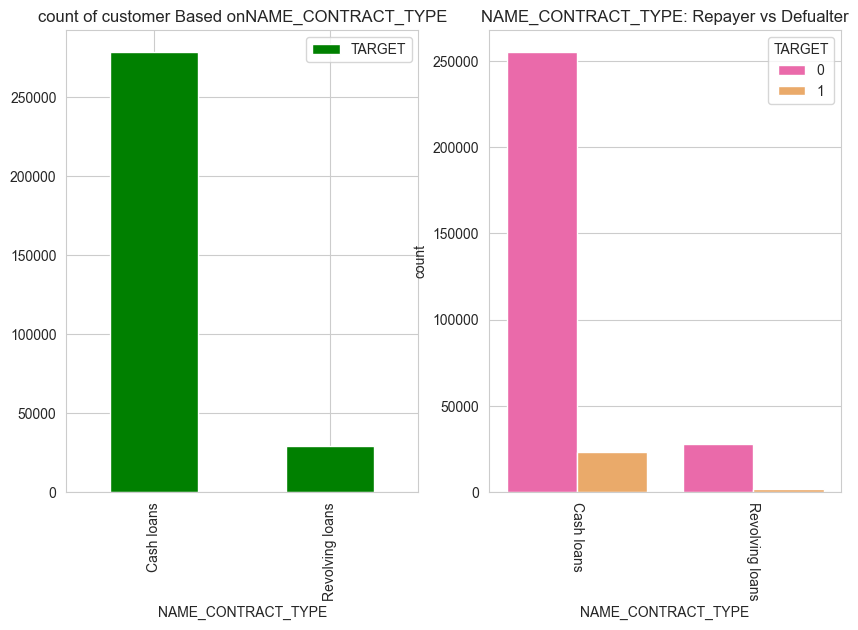

In [52]:
plot_re(application_train,'NAME_CONTRACT_TYPE','TARGET')

# Observation
its clear that  by looking at the above given plot and groupby function is clearly customer based on Contract type and the customer with cash loans  has high  count where not able to pay loan back compare to all other.

#### xii. Analysis based on WEEKDAY_APPR_PROCESS_START

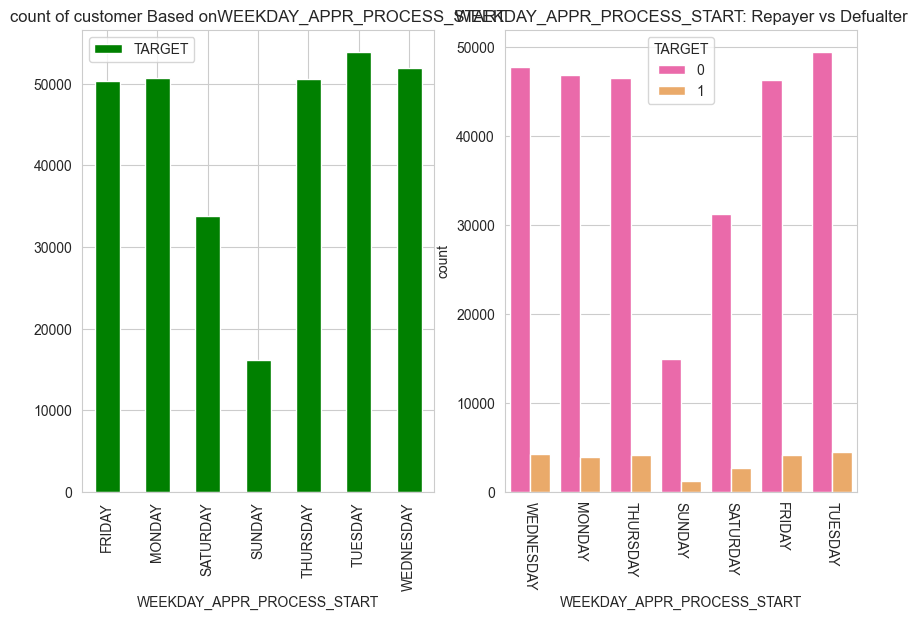

In [53]:
plot_re(application_train,'WEEKDAY_APPR_PROCESS_START','TARGET')

# Observation
its clear that  by looking at the above given plot and groupby function is clearly customer based application start on days and the customer registed  on tuesday  has high  count were not able to pay loan back compare to all other.

#### xiii. Analysis based House Type Mode

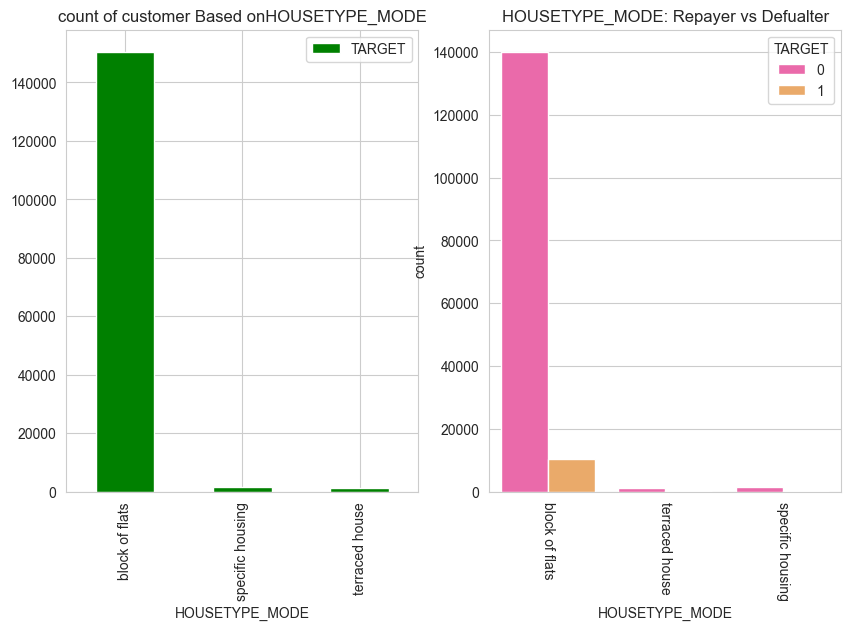

In [54]:
plot_re(application_train,'HOUSETYPE_MODE','TARGET')

# Observation
its clear that  by looking at the above given plot and groupby function is clearly customer based Housetype Mode and the customer registed  on Block of flats has high  count where not able to pay loan back compare to all other.

#### xiv. Analysis Based on EMERGENCYSTATE MODE 

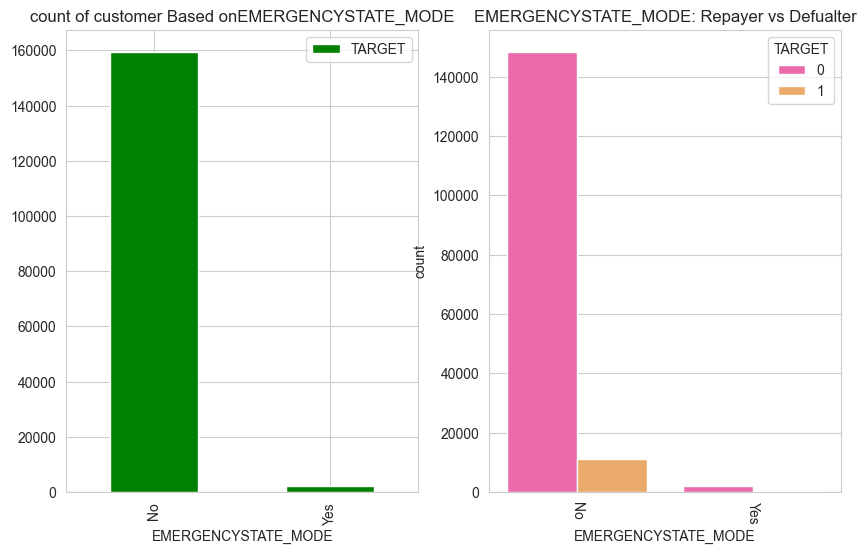

In [55]:
plot_re(application_train,'EMERGENCYSTATE_MODE','TARGET')

# Observation
its clear that  by looking at the above given plot and groupby function is clearly customer based Emergency state Mode and the customer has No  has high  count where not able to pay loan back compare to all other.

### ANALYSIS THE NUMBERICAL FEATURES 


#### ANALYZSIS BASED ON  COUNT CHILDREN 

In [56]:
sns.set_style('whitegrid')
f, ax = plt.subplots(3,1,figsize=(20,15))

# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='CNT_CHILDREN', data=application_train, ax=ax[0],palette=color_types).set_title('count based on Organization type');
sns.countplot(x="CNT_CHILDREN", hue='TARGET', 
              data=application_train,ax=ax[1]).set_title('REpayer VS Defaulter based on CNT_CHILDREN')
ax[2]=sns.kdeplot(application_train.loc[(application_train['TARGET'] == 0),'CNT_CHILDREN'] , color='b',shade=True,label='NON-PAYERS')
ax[2]=sns.kdeplot(application_train.loc[(application_train['TARGET'] == 1),'CNT_CHILDREN'] , color='r',shade=True, label='REPAYERS')
ax[2].set_title('Children count Distribution - Repayer V.S. Non Repayers')
plt.show()

# Observation
its clear that  by looking at the above given plots and groupby function is clearly customer based count of children and the customer with   has No  children has high  count and customer with more than  8   50% of non payer based on it own count where not able to pay loan back compare to all other.

Text(0.5, 1.0, 'customer Amount Annual income Distribution')

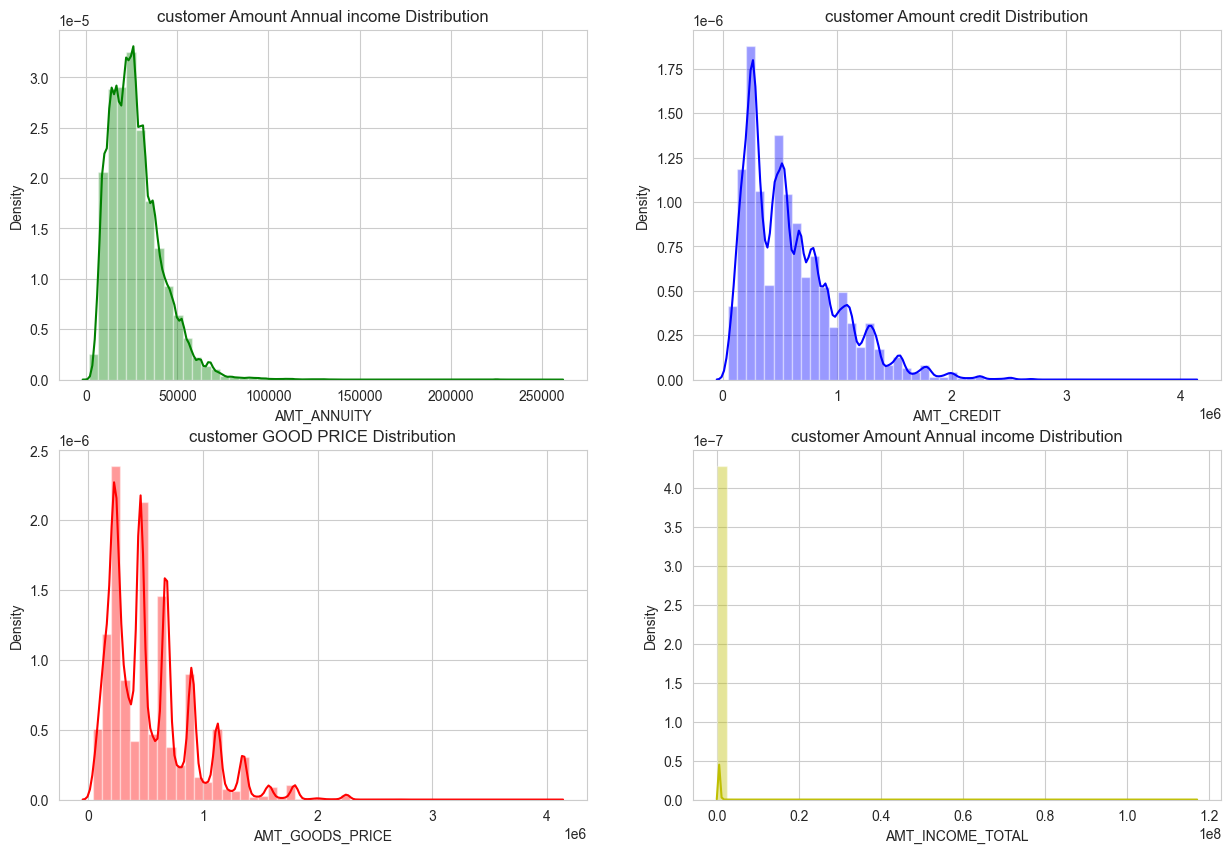

In [57]:
# Set up the matplotlib figure
f, ax = plt.subplots(2,2, figsize=(15, 10))

# Graph amt annutiy Satisfaction
sns.distplot(application_train.AMT_ANNUITY.dropna(), kde=True, color="g", ax=ax[0,0]).set_title('customer Amount Annual income Distribution')


# Graph amt credit Evaluation
sns.distplot(application_train.AMT_CREDIT.dropna(), kde=True, color="b", ax=ax[0,1]).set_title('customer Amount credit Distribution')

# Graph anaual GOOD PRICE  
sns.distplot(application_train.AMT_GOODS_PRICE.dropna(), kde=True, color="r", ax=ax[1,0]).set_title('customer GOOD PRICE Distribution')


sns.distplot(application_train.AMT_INCOME_TOTAL.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('customer Amount Annual income Distribution')



# Observation
if we see  the above given distrbution plot it clear say major distrbuiton  for amouth annuity is from 0 to 75000 and amount of anual income is from 0 to 1000000

Text(0.5, 1.0, 'customer Days of Registration Distribution')

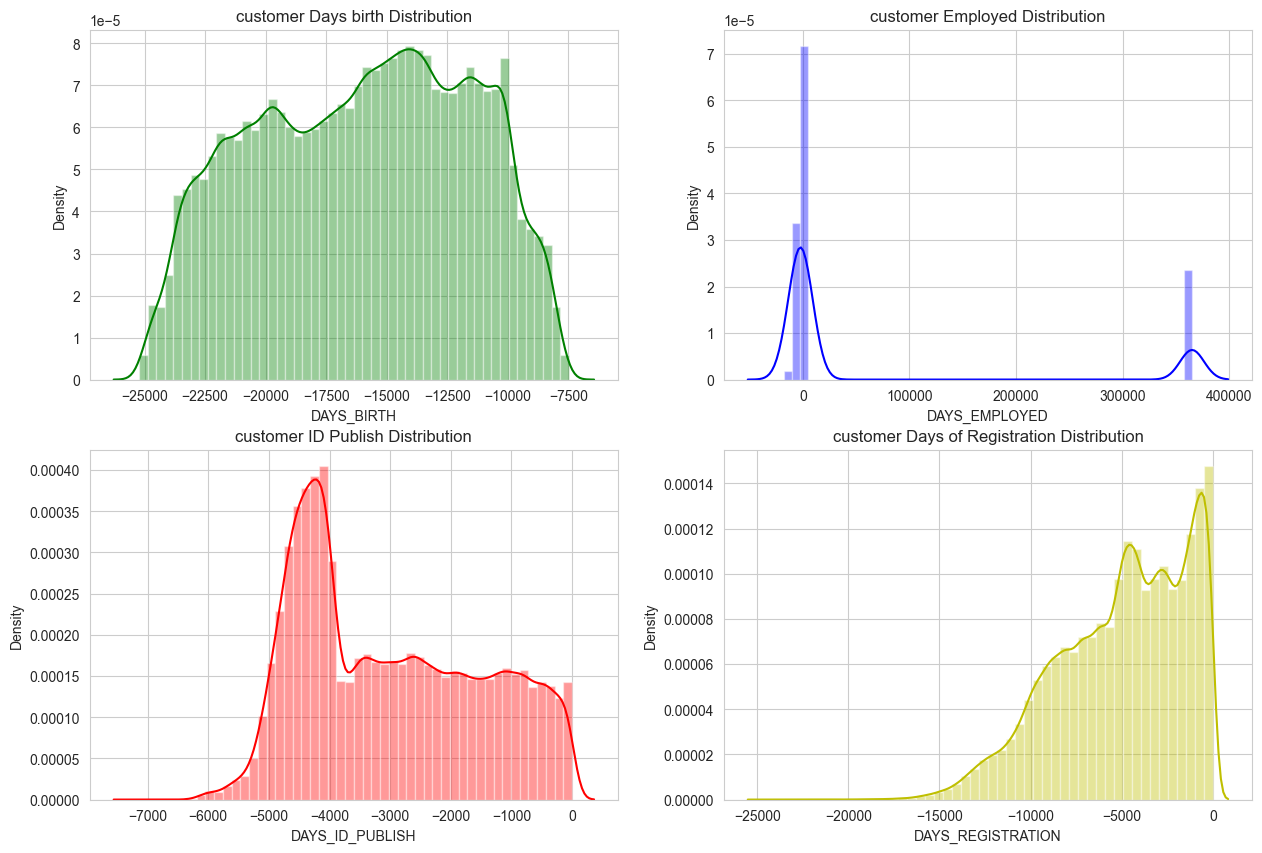

In [58]:
sns.set_style('whitegrid')
# Set up the matplotlib figure
f, ax = plt.subplots(2,2, figsize=(15, 10))

# Graph amt annutiy Satisfaction
sns.distplot(application_train.DAYS_BIRTH.dropna(), kde=True, color="g", ax=ax[0,0]).set_title('customer Days birth Distribution')

sns.distplot(application_train.DAYS_EMPLOYED.dropna(), kde=True, color="b", ax=ax[0,1]).set_title('customer Employed Distribution')

sns.distplot(application_train.DAYS_ID_PUBLISH.dropna(), kde=True, color="r", ax=ax[1,0]).set_title('customer ID Publish Distribution')


sns.distplot(application_train.DAYS_REGISTRATION.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('customer Days of Registration Distribution')


#### Analysis based on   REGION_RATING_CLIENT , REGION_RATING_CLIENT_W_CITY', HOUR_APPR_PROCESS_STAR',
  REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
  LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY
 REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'

if we look at the above plot it is clear that customer register in city but not work in city based analysis we know that customer not city has high count.

### Checking the  Correlation Between The Features for Application Train Dataset

In [59]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20,15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.select_dtypes(include=['int','float']).corr(), 
        cmap = colormap,
        square=True, 
        #cbar_kws={'shrink':.9 }, 
        #ax=ax,
        #annot=True, 
        #linewidths=0.1,vmax=1.0, linecolor='white',
        #annot_kws={'fontsize':16}
    )
    
    plt.title('Pearson Correlation of Features')

correlation_heatmap(application_train)



# Observation
If look at the above given plot is clear that all AVG featuers are high correleted values by seeing this plot we can easy find out the coorelated features

In [60]:
# most correlated features
corrmat = application_train.select_dtypes(include=['int','float']).corr()
top_corr_features = corrmat.index[abs(corrmat["TARGET"])>=0.03]
plt.figure(figsize=(20,10))
g = sns.heatmap(application_train[top_corr_features].corr(),annot=True,cmap="Oranges")

# Observation
By see above given two  corelation plot  we can easy find out  the most corelated featuers along with they corelated values.  and all kind of analysis are done for the application train dataset.

## EDA of Bureau Data

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

In [61]:
ap_train=application_train
br_data=bureau

### Merging the bureau dataset along with application train dataset to do more analysis

In [62]:
print('Applicatoin train shape before merge: ', ap_train.shape)
ap_train = ap_train.merge(br_data, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
print('Applicatoin train shape after merge: ', ap_train.shape)

Applicatoin train shape before merge:  (307511, 122)
Applicatoin train shape after merge:  (1465325, 138)


### Analysis Based on CREDIT ACTIVE, CREDIT_CURRENCY, CREDIT TYPE

In [63]:
plot_re(ap_train,'CREDIT_ACTIVE','TARGET')

In [64]:
plot_re(ap_train,'CREDIT_CURRENCY','TARGET')

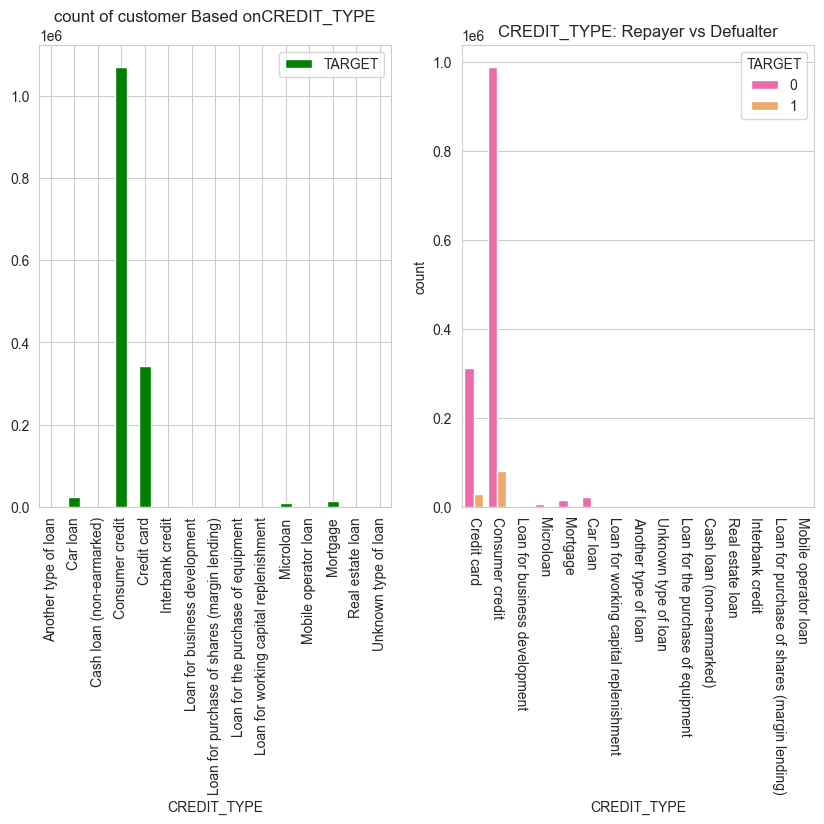

In [65]:
plot_re(ap_train,'CREDIT_TYPE','TARGET')

# Observation
BASED on above  given plot it clear that the Credit type consumer credit has high count of non payer of loan and credit currency customer with currency 1 has high count of non payer and based credit active customer with in group of closed customer has high count of non payer

# 2.Data Preprocessing

### 1. Handling Missing values

In [66]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [67]:
# Function to get missing value percentage
def missing_percentage(df):
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({"Missing Values": missing, "Percentage": missing_percent})
    return missing_df[missing_df['Missing Values'] > 0].sort_values(by="Percentage", ascending=False)

# Check missing values in application_train
missing_app = missing_percentage(application_train)
print("Missing values in application_train:")
display(missing_app)

Missing values in application_train:


Missing Values  Percentage
COMMONAREA_MEDI                       214865   69.872297
COMMONAREA_AVG                        214865   69.872297
COMMONAREA_MODE                       214865   69.872297
NONLIVINGAPARTMENTS_MEDI              213514   69.432963
NONLIVINGAPARTMENTS_MODE              213514   69.432963
NONLIVINGAPARTMENTS_AVG               213514   69.432963
FONDKAPREMONT_MODE                    210295   68.386172
LIVINGAPARTMENTS_MODE                 210199   68.354953
LIVINGAPARTMENTS_MEDI                 210199   68.354953
LIVINGAPARTMENTS_AVG                  210199   68.354953
FLOORSMIN_MODE                        208642   67.848630
FLOORSMIN_MEDI                        208642   67.848630
FLOORSMIN_AVG                         208642   67.848630
YEARS_BUILD_MODE                      204488   66.497784
YEARS_BUILD_MEDI                      204488   66.497784
YEARS_BUILD_AVG                       204488   66.497784
OWN_CAR_AGE                           202929   65.990810
LANDAREA_AVG                          182590   59.376738
LANDAREA_MEDI                         182590   59.376738
LANDAREA_MODE                         182590   59.376738
BASEMENTAREA_MEDI                     179943   58.515956
BASEMENTAREA_AVG                      179943   58.515956
BASEMENTAREA_MODE                     179943   58.515956
EXT_SOURCE_1                          173378   56.381073
NONLIVINGAREA_MEDI                    169682   55.179164
NONLIVINGAREA_MODE                    169682   55.179164
NONLIVINGAREA_AVG                     169682   55.179164
ELEVATORS_MEDI                        163891   53.295980
ELEVATORS_MODE                        163891   53.295980
ELEVATORS_AVG                         163891   53.295980
WALLSMATERIAL_MODE                    156341   50.840783
APARTMENTS_MODE                       156061   50.749729
APARTMENTS_MEDI                       156061   50.749729
APARTMENTS_AVG                        156061   50.749729
ENTRANCES_MODE                        154828   50.348768
ENTRANCES_AVG                         154828   50.348768
ENTRANCES_MEDI                        154828   50.348768
LIVINGAREA_MEDI                       154350   50.193326
LIVINGAREA_MODE                       154350   50.193326
LIVINGAREA_AVG                        154350   50.193326
HOUSETYPE_MODE                        154297   50.176091
FLOORSMAX_MEDI                        153020   49.760822
FLOORSMAX_AVG                         153020   49.760822
FLOORSMAX_MODE                        153020   49.760822
YEARS_BEGINEXPLUATATION_AVG           150007   48.781019
YEARS_BEGINEXPLUATATION_MEDI          150007   48.781019
YEARS_BEGINEXPLUATATION_MODE          150007   48.781019
TOTALAREA_MODE                        148431   48.268517
EMERGENCYSTATE_MODE                   145755   47.398304
OCCUPATION_TYPE                        96391   31.345545
EXT_SOURCE_3                           60965   19.825307
AMT_REQ_CREDIT_BUREAU_WEEK             41519   13.501631
AMT_REQ_CREDIT_BUREAU_DAY              41519   13.501631
AMT_REQ_CREDIT_BUREAU_MON              41519   13.501631
AMT_REQ_CREDIT_BUREAU_QRT              41519   13.501631
AMT_REQ_CREDIT_BUREAU_HOUR             41519   13.501631
AMT_REQ_CREDIT_BUREAU_YEAR             41519   13.501631
NAME_TYPE_SUITE                         1292    0.420148
DEF_30_CNT_SOCIAL_CIRCLE                1021    0.332021
OBS_60_CNT_SOCIAL_CIRCLE                1021    0.332021
DEF_60_CNT_SOCIAL_CIRCLE                1021    0.332021
OBS_30_CNT_SOCIAL_CIRCLE                1021    0.332021
EXT_SOURCE_2                             660    0.214626
AMT_GOODS_PRICE                          278    0.090403
AMT_ANNUITY                               12    0.003902
CNT_FAM_MEMBERS                            2    0.000650
DAYS_LAST_PHONE_CHANGE                     1    0.000325

In [68]:
cols_to_drop=missing_app[missing_app['Percentage'] > 50].index

In [69]:
application_train_cleaned = application_train.drop(columns=cols_to_drop)
print("Droped Columns are",cols_to_drop)

Droped Columns are Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MEDI',
       'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'ELEVATORS_MEDI',
       'ELEVATORS_MODE', 'ELEVATORS_AVG', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'ENTRANCES_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE'],
      dtype='object')


- Since the above columns have more than 50% data missing, it would be wise to drop these columns because if we keep them, they would impact our overal analysis.

#### There are few columns with missing value percentage very close to 50%. Which are -
1. YEARS_BEGINEXPLUATATION_AVG     
2. FLOORSMAX_AVG                   
3. YEARS_BEGINEXPLUATATION_MODE    
4. FLOORSMAX_MODE                  
5. YEARS_BEGINEXPLUATATION_MEDI    
6. FLOORSMAX_MEDI                  
7. TOTALAREA_MODE                 
8. EMERGENCYSTATE_MODE

- These columns should also be dropped as they have close to 50% data missing and if we impute them in some manner our dataset would be heavily biased and we will not be able to draw an appropriate insight.

In [70]:
cols_to_drop = [
    'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
    'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
    'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI',
    'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE'
]

application_train_cleaned= application_train_cleaned.drop(columns=cols_to_drop)

#### There is this column OCCUPATION_TYPE  with 31.35% data missing. 
 - As OCCUPATION_TYPE is a categorical variable and is of object type and since the missing value percentage is high (31.35%) we could NOT take its mode value to fill the missing ones because that will simply make the data biased. So, it would be safe to rather create a new type 'Unknown' to fill the missing values.

In [71]:
# Fill missing values in OCCUPATION_TYPE with 'Unknown'
application_train_cleaned['OCCUPATION_TYPE'] = application_train_cleaned['OCCUPATION_TYPE'].fillna('Unknown')

 Columns with around 13% missing values. Now we are going to consider the columns with approximately 13% missing values and suggest the possible imputation strategies for each of them. From the above list the below columns are found to have around 13% values missing. Let's inspect them. Columns to be considered -
   
1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT
6. AMT_REQ_CREDIT_BUREAU_YEAR

In [72]:
application_train_cleaned[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

Here we can replace the missing values with the respective median value for all these columns. The reason for choosing median over mean is that these columns represent 'Number of enquiries...' which can't be a floating value. It must be a whole number and that's why we are going to use median to fill missing values. 

In [73]:
inquiry_columns = [
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]
# Fill missing values in 'Number of enquiries...' columns with median
for col in inquiry_columns:
    median_val = application_train_cleaned[col].median()
    application_train_cleaned[col].fillna(median_val, inplace=True)


In [74]:
cols_to_impute=missing_app[missing_app['Percentage'] < 0.5].index

In [75]:
cols_to_impute

Index(['NAME_TYPE_SUITE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [76]:
application_train_cleaned[['NAME_TYPE_SUITE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']].head()

NAME_TYPE_SUITE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0   Unaccompanied                       2.0                       2.0   
1          Family                       0.0                       1.0   
2   Unaccompanied                       0.0                       0.0   
3   Unaccompanied                       0.0                       2.0   
4   Unaccompanied                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  \
0                       2.0                       2.0      0.262949   
1                       0.0                       1.0      0.622246   
2                       0.0                       0.0      0.555912   
3                       0.0                       2.0      0.650442   
4                       0.0                       0.0      0.322738   

   AMT_GOODS_PRICE  AMT_ANNUITY  CNT_FAM_MEMBERS  DAYS_LAST_PHONE_CHANGE  
0         351000.0      24700.5              1.0                 -1134.0  
1        1129500.0      35698.5              2.0                  -828.0  
2         135000.0       6750.0              1.0                  -815.0  
3         297000.0      29686.5              2.0                  -617.0  
4         513000.0      21865.5              1.0                 -1106.0

In [77]:
print("application_train_cleaned :",application_train_cleaned['NAME_TYPE_SUITE'].value_counts())
print("application_train_cleaned :",application_train_cleaned['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts())
print("application_train_cleaned :",application_train_cleaned['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts())
print("application_train_cleaned :",application_train_cleaned['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts())
print("application_train_cleaned :",application_train_cleaned['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts())

application_train_cleaned : NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
application_train_cleaned : DEF_30_CNT_SOCIAL_CIRCLE
0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: count, dtype: int64
application_train_cleaned : OBS_60_CNT_SOCIAL_CIRCLE
0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47

In [78]:
application_train_cleaned['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace = True) 
application_train_cleaned['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0,inplace = True) 
application_train_cleaned['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0,inplace = True) 
application_train_cleaned['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0,inplace = True)
application_train_cleaned['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0,inplace = True) 

In [79]:
application_train_cleaned['EXT_SOURCE_2'].fillna(application_train_cleaned['EXT_SOURCE_2'].median(),inplace = True) 
application_train_cleaned['EXT_SOURCE_3'].fillna(application_train_cleaned['EXT_SOURCE_2'].median(),inplace = True) 
application_train_cleaned['AMT_GOODS_PRICE'].fillna(application_train_cleaned['AMT_GOODS_PRICE'].median(),inplace = True) 
application_train_cleaned['AMT_ANNUITY'].fillna(application_train_cleaned['AMT_ANNUITY'].median(),inplace = True) 
application_train_cleaned['DAYS_LAST_PHONE_CHANGE'].fillna(application_train_cleaned['DAYS_LAST_PHONE_CHANGE'].median(),inplace = True) 

In [80]:
# In column CNT_FAM_MEMBERS -Please note that there are only 2 rows of missing values, so we can replace it by the median value(since it must be a whole number)
application_train_cleaned['CNT_FAM_MEMBERS'].fillna(application_train_cleaned['CNT_FAM_MEMBERS'].median(),inplace = True) 

In [81]:
missing_percentage(application_train_cleaned)

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

### 2.Data Type Correction 

There are certain columns in the data set which have incorrect data types. We can change them to appropriate data type.

Note: We cannot perform the data type change for some columns until we actually impute the missing data. In that case only suggestion is provided.

1. The below columns represent the number of enquires to Credit Bureau about the client. However, the data present are in float which is not correct. Here we need to change the data type to int.
- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR
2. Similarly for DAYS_REGISTRATION column, we need to change it into int as it shows the number of days.
3. For CNT_FAM_MEMBERS column, which displays the number of family members of the client, we need to change it into int type as well since number of family member cannot be a float type.
4. We can change the columns which represent Yes or No values as 0 and 1 into Category data type for better plotting and thus reading. 

In [82]:
# List of columns to convert
columns_to_convert = [
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'DAYS_REGISTRATION',
    'CNT_FAM_MEMBERS',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE'
]

# Convert to integer (after handling missing values if any)
for col in columns_to_convert:
    application_train_cleaned[col] = application_train_cleaned[col].astype(int)


In [83]:
# We can convert these DAYS columns into int data type as it is anyway going to be a whole number.

col_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for i in col_list:
    application_train_cleaned[i] = application_train_cleaned[i].astype(int)

# We have NOT converted the data type of DAYS_LAST_PHONE_CHANGE 
# as it has some missing values which need to be treated (replace by median) first.

In [84]:
# Verify the changes
application_train_cleaned[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','DAYS_REGISTRATION']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   DAYS_BIRTH         307511 non-null  int32
 1   DAYS_EMPLOYED      307511 non-null  int32
 2   DAYS_REGISTRATION  307511 non-null  int32
 3   DAYS_ID_PUBLISH    307511 non-null  int32
 4   CNT_FAM_MEMBERS    307511 non-null  int32
 5   DAYS_REGISTRATION  307511 non-null  int32
dtypes: int32(6)
memory usage: 7.0 MB


###  3.Data standardization 
There are some columns which represent number of days but have some negative values. We need to fix that by replacing those values with their respective absolute values. The columns are
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- DAYS_LAST_PHONE_CHANGE

In [85]:
# Make a list of all DAYS columns
col_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

# Replace the values with their respective absolute values
for i in col_list:
    application_train_cleaned[i] = abs(application_train_cleaned[i])

# Verify the changes
application_train_cleaned[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637               3648             2120   
1       16765           1188               1186              291   
2       19046            225               4260             2531   
3       19005           3039               9833             2437   
4       19932           3038               4311             3458   

   DAYS_LAST_PHONE_CHANGE  
0                  1134.0  
1                   828.0  
2                   815.0  
3                   617.0  
4                  1106.0

In [86]:
application_train_cleaned['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [87]:
# Get rid of improper value XNA by replacing it with NaN - not using mode as that would be imputation

application_train_cleaned['CODE_GENDER'] = application_train_cleaned['CODE_GENDER'].replace('XNA',np.nan)
application_train_cleaned['CODE_GENDER'].value_counts()

CODE_GENDER
F    202448
M    105059
Name: count, dtype: int64

### 4. Label Encoding Categorical Variables

In [88]:
from sklearn.preprocessing import LabelEncoder

cat_cols = application_train_cleaned.select_dtypes(include="object").columns
for col in cat_cols:
    le = LabelEncoder()
    application_train_cleaned[col] = application_train[col].astype(str)
    application_train_cleaned[col] = le.fit_transform(application_train[col])


In [89]:
application_train_cleaned.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0                6                 7                    4   
1        1129500.0                1                 4                    1   
2         135000.0                6                 7                    4   
3         297000.0                6                 7                    4   
4         513000.0                6                 7                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   3                  1                    0.018801   
1                   1                  1                    0.003541   
2                   3                  1                    0.010032   
3                   0                  1                    0.008019   
4                   3                  1                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0        9461            637               3648             2120           1   
1       16765           1188               1186              291           1   
2       19046            225               4260             2531           1   
3       19005           3039               9833             2437           1   
4       19932           3038               4311             3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                8                1                     2   
1                3                2                     1   
2                8                1                     2   
3                8                2                     2   
4                3                1                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           6   
1                            1                           1   
2                            2                           1   
3                            2                           6   
4                            2                           4   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                 

## Outlier Analysis 
As we know, there are possibilities of having exceptionally low or high values in our data termed as outliers. It is of very much importance to identify such data points and get the data treated to avoid wrong interpretation. We are going to consider the below columns for outlier analysis.
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION

In [90]:
def outlier_plot(var,title,label):
    
    plt.figure(figsize = [8,5])
    plt.title(title, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    sns.boxplot(y = var)
    plt.ylabel(label, fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Grey'})
    plt.show()


In [91]:
# Ploting boxplot on AMT_INCOME_TOTAL for outlier analysis
var = application_train_cleaned['AMT_INCOME_TOTAL']/100000
title = "Client's income"
label = 'Income in Lakhs'

outlier_plot(var,title,label)
# Describe to check the summary

(application_train_cleaned['AMT_INCOME_TOTAL']/100000).describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [92]:
# print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_INCOME_TOTAL
(application_train_cleaned['AMT_INCOME_TOTAL']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    1.4715
0.70    1.8000
0.90    2.7000
0.95    3.3750
0.99    4.7250
Name: AMT_INCOME_TOTAL, dtype: float64

# Observation 
- AMT_INCOME_TOTAL(Income of the client) shows that some of the applicants have very high income as compared to others.
- There is definitely a huge difference between 75% and the maximum value. Let's print the quantile to check the difference between 0.95 or 0.99 quantile and the maximum value.
- AMT_INCOME_TOTAL - As we see there is a huge difference in 0.99 quantile and the maximum values. So, there are definitely outliers. As we know the income may vary from person to person, it would be good to decide on a cap value here and get rid of very high incomes. 

In [93]:
#  Cap AMT_INCOME_TOTAL at 99th percentile
cap_amt_income = application_train['AMT_INCOME_TOTAL'].quantile(0.99)

application_train_cleaned['AMT_INCOME_TOTAL'] = application_train_cleaned['AMT_INCOME_TOTAL'].apply(lambda x: min(x, cap_amt_income))

In [94]:
# Ploting boxplot on AMT_CREDIT for outlier analysis

var = application_train_cleaned['AMT_CREDIT']/100000
title = "Credit amount of the loan"
label = "Amount in Lakhs"

outlier_plot(var,title,label)
(application_train_cleaned['AMT_CREDIT']/100000).describe()

count    307511.000000
mean          5.990260
std           4.024908
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          40.500000
Name: AMT_CREDIT, dtype: float64

In [95]:
# print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_CREDIT

(application_train_cleaned['AMT_CREDIT']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     5.13531
0.70     7.55190
0.90    11.33748
0.95    13.50000
0.99    18.54000
Name: AMT_CREDIT, dtype: float64

# Observation
- AMT_CREDIT(Credit amount of loan) has some outliers. Since the amount credits can vary from person to person based on the loan applied, their eligibility and other factors, it is considerable.
- Also we have more applications with credit amount in the lower range below 5 lakhs.
- We can see an increase in value after 75% but it is not very high. Let's check the quantiles.
- AMT_CREDIT - In this case we have some high value after 99% bt they are not significantly high. We can replace then with median.

In [96]:
# Calculate thresholds
credit_99 = application_train_cleaned['AMT_CREDIT'].quantile(0.99)
credit_median = application_train_cleaned['AMT_CREDIT'].median()

#  Replace values above 99th percentile with median
application_train_cleaned['AMT_CREDIT'] = application_train_cleaned['AMT_CREDIT'].apply(lambda x: credit_median if x > credit_99 else x)

In [97]:
#Ploting boxplot on AMT_ANNUITY for outlier analysis

var = application_train_cleaned['AMT_ANNUITY']/100000
title = "Loan annuity"
label = "Loan Annuity in Lakhs"

outlier_plot(var,title,label)
(application_train_cleaned['AMT_ANNUITY']/100000).describe()

count    307511.000000
mean          0.271085
std           0.144935
min           0.016155
25%           0.165240
50%           0.249030
75%           0.345960
max           2.580255
Name: AMT_ANNUITY, dtype: float64

# Observation
- AMT_ANNUITY(Loan annuity) also has some outliers but it is kind of continuous. There is no sudden significant rise in the value.
- In this case as there is not a huge difference between 75% and the maximum value also the mean and median values are not much different , we can impute the outliers with median value.

In [98]:
annuity_99 = application_train_cleaned['AMT_ANNUITY'].quantile(0.99)
annuity_median = application_train_cleaned['AMT_ANNUITY'].median()

# Replace outliers above 99th percentile with median
application_train_cleaned['AMT_ANNUITY'] = application_train_cleaned['AMT_ANNUITY'].apply(lambda x: annuity_median if x > annuity_99 else x)

In [99]:
# Ploting boxplot on AMT_GOODS_PRICE for outlier analysis

var = application_train_cleaned['AMT_GOODS_PRICE']/100000
title = "Goods Price"
label = "Amount in Lakhs"

outlier_plot(var,title,label)
(application_train_cleaned['AMT_GOODS_PRICE']/100000).describe()

count    307511.000000
mean          5.383163
std           3.692890
min           0.405000
25%           2.385000
50%           4.500000
75%           6.795000
max          40.500000
Name: AMT_GOODS_PRICE, dtype: float64

In [100]:
(application_train_cleaned['AMT_GOODS_PRICE']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     4.500
0.70     6.750
0.90    10.935
0.95    13.050
0.99    18.000
Name: AMT_GOODS_PRICE, dtype: float64

- Mean and Median are not very different. Also, form the quantiles, the 0.99 and the maximum values are not very far apart. So, we can impute with median.

In [101]:
AMT_GOODS_PRICE_99 = application_train_cleaned['AMT_GOODS_PRICE'].quantile(0.99)
AMT_GOODS_PRICE_median = application_train_cleaned['AMT_GOODS_PRICE'].median()

# 🎯 Replace outliers above 99th percentile with median
application_train_cleaned['AMT_GOODS_PRICE'] = application_train_cleaned['AMT_GOODS_PRICE'].apply(lambda x: AMT_GOODS_PRICE_median if x > AMT_GOODS_PRICE_99 else x)

In [102]:
# Ploting boxplot on DAYS_BIRTH for outlier analysis

var = application_train_cleaned['DAYS_BIRTH']//365
title = "Client's age"
label = "Age in years"

outlier_plot(var,title,label)

# Observation
- DAYS_BIRTH - Client's age seems to have no outliers at all. No imputation or treatment required.

In [103]:
# Ploting boxplot on DAYS_EMPLOYED for outlier analysis

var = application_train_cleaned['DAYS_EMPLOYED']//365
title = "Employement duration"
label = "Years in Service"

outlier_plot(var,title,label)
(application_train_cleaned['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [104]:
(application_train_cleaned['DAYS_EMPLOYED']/365).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50       6.079452
0.70      12.150685
0.90    1000.665753
0.95    1000.665753
0.99    1000.665753
Name: DAYS_EMPLOYED, dtype: float64

# Observation 
- DAYS_EMPLOYED(Employment duration) data surely has huge outliers which is clearly visible from the boxplot.Some data points are showing close to 1000 years in service which is impossible.
- There is surely a huge difference in 75% and the maximum value. That explains the difference between mean and median value as well. Let's check the quantile.
- In case of DAYS_EMPLOYED, we can see no difference between  0.90 quantile and the maximum value. However, there is a huge difference between 0.70 and 0.90 quantiles. Here, we can say that close to 20% data is not correct and hence is not reliable. We can cap the value at 80% in this case.

In [105]:
cap_days_employed = application_train_cleaned['DAYS_EMPLOYED'].quantile(0.80)

# Cap values (Remember: values are negative)
application_train_cleaned['DAYS_EMPLOYED'] = application_train_cleaned['DAYS_EMPLOYED'].apply(
    lambda x: cap_days_employed if x > cap_days_employed else x
)

In [106]:
# Ploting boxplot on DAYS_REGISTRATION for outlier analysis

var = application_train_cleaned['DAYS_REGISTRATION']//365
title = "Bank membership duration"
label = "Registered for in years"

outlier_plot(var,title,label)
(application_train_cleaned['DAYS_REGISTRATION']/365).describe()

count    307511.000000
mean         13.660604
std           9.651743
min           0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

# Observation
-  In case of DAYS_REGISTRATION - Bank membership duration, we can see that we have some applicants with the bank for very long time , close to 70 years, which is rare but not impossible. There are people who tie up with a bank and stay loyal to the same one for life time.
- We dont see much difference between mean and median. So, we can replace the outliers with median value. 

In [107]:
DAYS_REGISTRATION_99 = application_train_cleaned['DAYS_REGISTRATION'].quantile(0.99)
DAYS_REGISTRATION_median = application_train_cleaned['DAYS_REGISTRATION'].median()

# Replace outliers above 99th percentile with median
application_train_cleaned['DAYS_REGISTRATION'] = application_train_cleaned['DAYS_REGISTRATION'].apply(lambda x: DAYS_REGISTRATION_median if x > DAYS_REGISTRATION_99 else x)

# Feature Engineering

In [108]:
# Apply feature engineering to both cleaned train and test sets
df = application_train_cleaned 
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['ANNUITY_CREDIT_RATIO'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
df['GOODS_CREDIT_RATIO'] = df['AMT_GOODS_PRICE'] / df['AMT_CREDIT']

df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS'].replace(0, 1)
df['CHILD_RATIO'] = df['CNT_CHILDREN'] / df['CNT_FAM_MEMBERS'].replace(0, 1)
df['HAS_CHILDREN'] = df['CNT_CHILDREN'].apply(lambda x: 1 if x > 0 else 0)

df['AGE_YEARS'] = abs(df['DAYS_BIRTH']) / 365
df['EMPLOYED_YEARS'] = abs(df['DAYS_EMPLOYED']) / 365
df['EMPLOYED_TO_AGE_RATIO'] = df['EMPLOYED_YEARS'] / df['AGE_YEARS']

df['INCOME_WORK_DIFF'] = df['DAYS_EMPLOYED'] - df['DAYS_REGISTRATION']
df['LIVE_WORK_DIFF'] = df['DAYS_EMPLOYED'] - df['DAYS_ID_PUBLISH']

# Count total number of flags
doc_flags = [col for col in df.columns if 'FLAG_DOC' in col]
df['DOCUMENT_COUNT'] = df[doc_flags].sum(axis=1)

live_flags = [col for col in df.columns if 'FLAG_' in col and 'FLAG_DOC' not in col]
df['FLAG_COUNT'] = df[live_flags].sum(axis=1)


In [109]:
df.shape

(307511, 87)

## Get the features and target

In [110]:
X = df.drop(columns = ["TARGET"])
y = df["TARGET"]
feature_value_names = X.columns

In [111]:
y.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

## Split data into Train and Test
Now, we can split our data into traing with percentage of 80 and testing with percentage of 20.

In [112]:
#80% training set, 20% testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Check categorical target
As the bar chart shows, we get 282686 target'0' and 24825 target'1',the two classes are quitely imbalanced.

In [113]:
y_train.value_counts()

TARGET
0    226148
1     19860
Name: count, dtype: int64

## Over sampling
Since most machine learning algorithms work best when the number of samples in each class are about equal, we need to deal with the imbalanced problem. Here we use over sampling method.



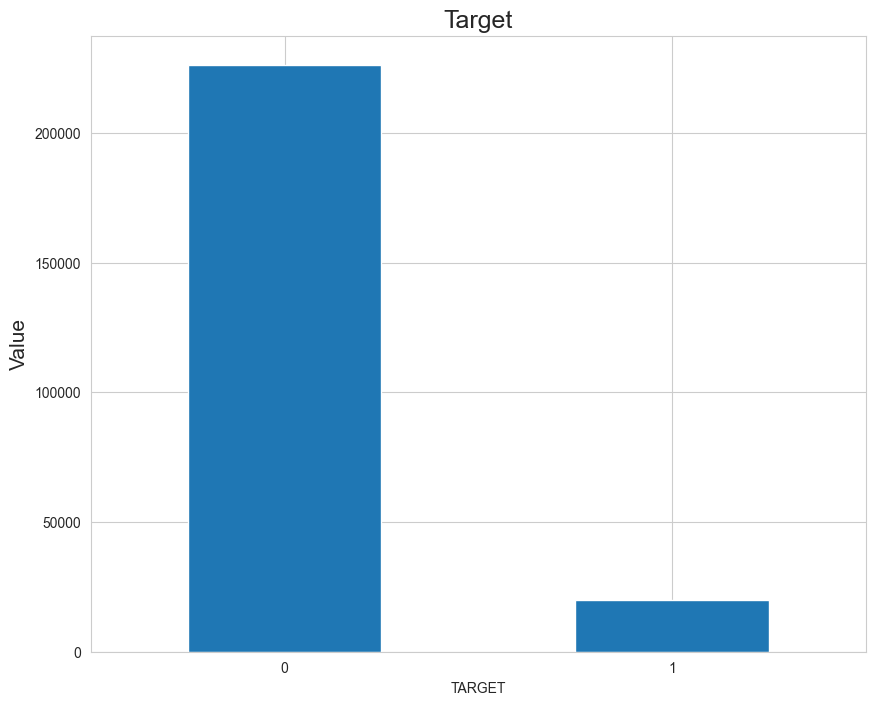

In [114]:

y_train.value_counts().plot(kind='bar',figsize=(10 ,8),width=0.5)
plt.xticks(rotation='horizontal')
plt.title('Target',fontsize=18)
plt.ylabel("Value",fontsize=15) 
plt.show()

In [127]:
import pandas as pd
import numpy as np
#data preprocessing packages

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#model training packages
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
#Model selection packages
from IPython.display import Image

In [115]:
# RandomOverSampler (with random_state=0)
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Optional: Check class balance
import pandas as pd
print(pd.Series(y_train_resampled).value_counts())


TARGET
0    226148
1    226148
Name: count, dtype: int64


In [116]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [119]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [120]:
print(X_train.shape)
print(y_train.shape)

(246008, 86)
(246008,)


# Model Training

In [121]:
## 1.Logistic regression

In [122]:
lr= LogisticRegression()
lr_fitted=lr.fit(X_train_scaled,y_train_resampled)

In [123]:
y_pred = lr_fitted.predict(X_test_scaled)
y_proba = lr_fitted.predict_proba(X_test_scaled)

In [124]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, 
    classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_classification_model(y_test, y_pred, y_proba, model_name="Model"):
    print(f" Evaluation Metrics for {model_name}:\n")
    
    # Core metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba[:, 1])

    print(f" Accuracy      : {accuracy:.4f}")
    print(f" Precision     : {precision:.4f}")
    print(f" Recall        : {recall:.4f}")
    print(f" F1 Score      : {f1:.4f}")
    print(f" ROC-AUC Score : {auc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\n Confusion Matrix:")
    print(cm)

    # Classification Report
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}", color='blue')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.title(f"ROC Curve - {model_name}", fontsize=14)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Confusion Matrix as Heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"Confusion Matrix - {model_name}", fontsize=14)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


 Evaluation Metrics for Logistic Regression:

 Accuracy      : 0.8579
 Precision     : 0.1879
 Recall        : 0.2288
 F1 Score      : 0.2063
 ROC-AUC Score : 0.6550

 Confusion Matrix:
[[51628  4910]
 [ 3829  1136]]

 Classification Report:
              precision    recall  f1-score   support

           0     0.9310    0.9132    0.9220     56538
           1     0.1879    0.2288    0.2063      4965

    accuracy                         0.8579     61503
   macro avg     0.5594    0.5710    0.5642     61503
weighted avg     0.8710    0.8579    0.8642     61503



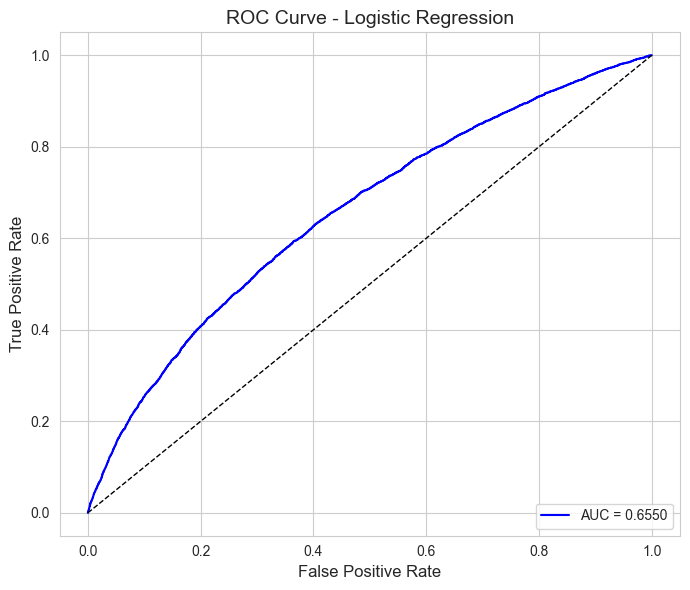

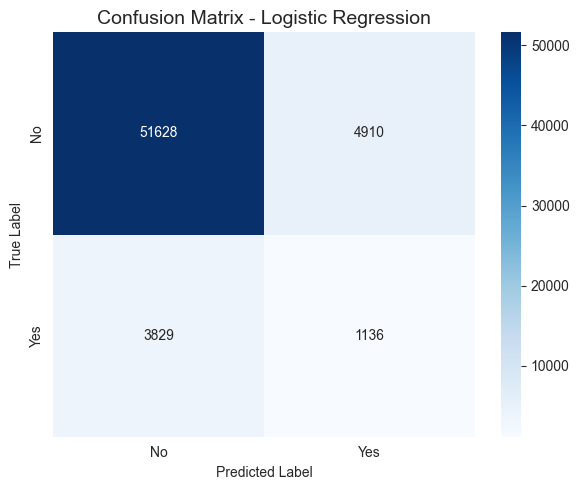

In [125]:
evaluate_classification_model(y_test, y_pred, y_proba, model_name="Logistic Regression")

In [126]:
model_results = []
def evaluate_and_store_model(y_test, y_pred, y_proba, model_name):
    metrics_dict = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba[:, 1])
    }
    model_results.append(metrics_dict)
evaluate_and_store_model(y_test, y_pred, y_proba, model_name="Logistic Regression")

In [128]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


# Define MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(64,), 
    max_iter=300,
    early_stopping=True,
    verbose=True,
    random_state=42
)

# Train
mlp_fitted = mlp.fit(X_train_scaled, y_train_resampled)


Iteration 1, loss = 0.29538663
Validation score: 0.895114
Iteration 2, loss = 0.24948833
Validation score: 0.900000
Iteration 3, loss = 0.24063066
Validation score: 0.902719
Iteration 4, loss = 0.23547184
Validation score: 0.905107
Iteration 5, loss = 0.23192068
Validation score: 0.906146
Iteration 6, loss = 0.22934728
Validation score: 0.909529
Iteration 7, loss = 0.22748407
Validation score: 0.908932
Iteration 8, loss = 0.22566814
Validation score: 0.910192
Iteration 9, loss = 0.22452270
Validation score: 0.910126
Iteration 10, loss = 0.22353091
Validation score: 0.909087
Iteration 11, loss = 0.22253741
Validation score: 0.910679
Iteration 12, loss = 0.22201600
Validation score: 0.911541
Iteration 13, loss = 0.22118421
Validation score: 0.911209
Iteration 14, loss = 0.22082666
Validation score: 0.911961
Iteration 15, loss = 0.22019571
Validation score: 0.911585
Iteration 16, loss = 0.21950945
Validation score: 0.909131
Iteration 17, loss = 0.21916322
Validation score: 0.912116
Iterat

In [129]:
y_pred = mlp_fitted.predict(X_test_scaled)
y_proba = mlp_fitted.predict_proba(X_test_scaled)


 Evaluation Metrics for MLP Classifier:

 Accuracy      : 0.8828
 Precision     : 0.1871
 Recall        : 0.1351
 F1 Score      : 0.1569
 ROC-AUC Score : 0.6619

 Confusion Matrix:
[[53622  2916]
 [ 4294   671]]

 Classification Report:
              precision    recall  f1-score   support

           0     0.9259    0.9484    0.9370     56538
           1     0.1871    0.1351    0.1569      4965

    accuracy                         0.8828     61503
   macro avg     0.5565    0.5418    0.5470     61503
weighted avg     0.8662    0.8828    0.8740     61503



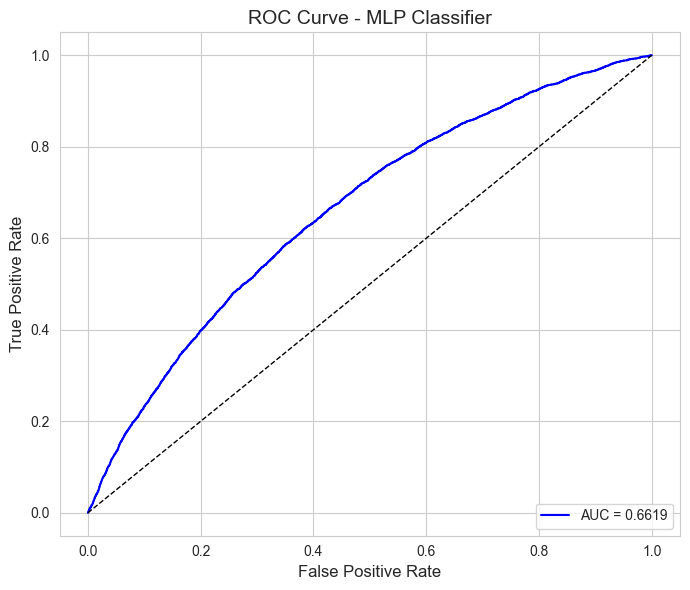

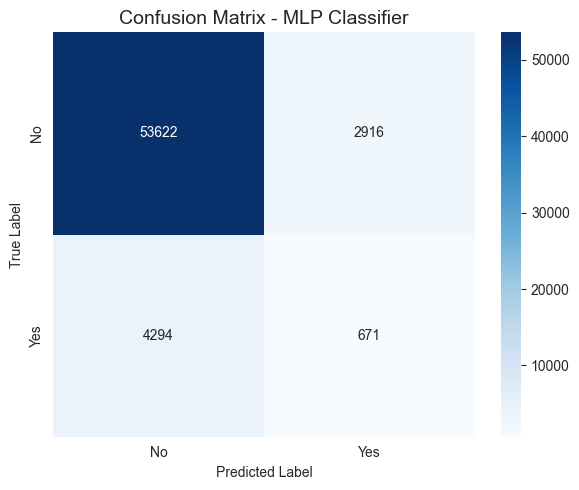

In [130]:
evaluate_classification_model(y_test, y_pred, y_proba, model_name="MLP Classifier")

In [131]:
evaluate_and_store_model(y_test, y_pred, y_proba, model_name="MLP Classifier")

In [132]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)  # You can tune max_depth
dt_model.fit(X_train_scaled, y_train_resampled)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [133]:
y_pred_dt = dt_model.predict(X_test_scaled)
y_proba_dt = dt_model.predict_proba(X_test_scaled)


 Evaluation Metrics for Decision Tree:

 Accuracy      : 0.7819
 Precision     : 0.1287
 Recall        : 0.2949
 F1 Score      : 0.1792
 ROC-AUC Score : 0.6400

 Confusion Matrix:
[[46626  9912]
 [ 3501  1464]]

 Classification Report:
              precision    recall  f1-score   support

           0     0.9302    0.8247    0.8743     56538
           1     0.1287    0.2949    0.1792      4965

    accuracy                         0.7819     61503
   macro avg     0.5294    0.5598    0.5267     61503
weighted avg     0.8655    0.7819    0.8181     61503



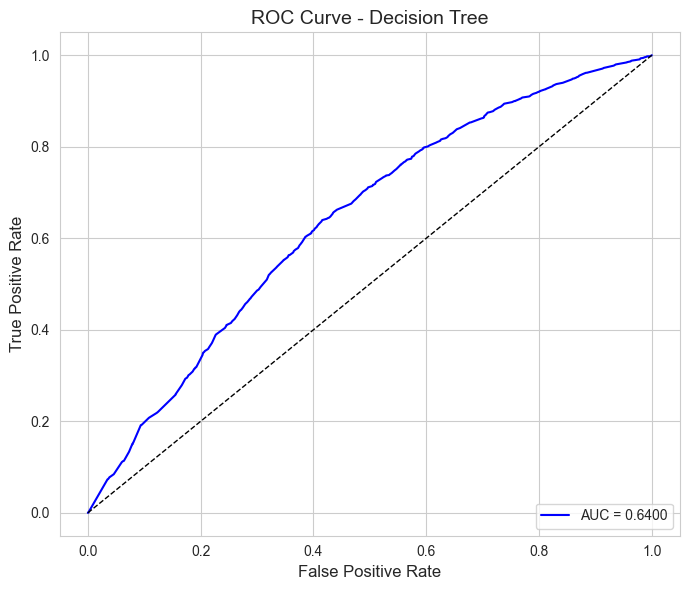

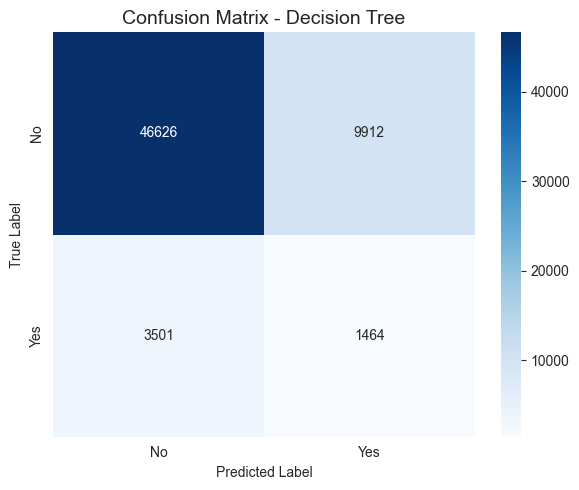

In [134]:
evaluate_classification_model(y_test, y_pred_dt, y_proba_dt, model_name="Decision Tree")

In [135]:
evaluate_and_store_model(y_test, y_pred_dt, y_proba_dt, model_name="Decision Tree")

In [136]:
rf_model = RandomForestClassifier(
    n_estimators=100,        
    max_depth=50,              
    class_weight='balanced',   
    random_state=42,
    n_jobs=-1                  
)

rf_model.fit(X_train_scaled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', max_depth=50, n_jobs=-1,
                       random_state=42)

In [137]:
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)


 Evaluation Metrics for Random Forest:

 Accuracy      : 0.8999
 Precision     : 0.1816
 Recall        : 0.0683
 F1 Score      : 0.0992
 ROC-AUC Score : 0.6823

 Confusion Matrix:
[[55010  1528]
 [ 4626   339]]

 Classification Report:
              precision    recall  f1-score   support

           0     0.9224    0.9730    0.9470     56538
           1     0.1816    0.0683    0.0992      4965

    accuracy                         0.8999     61503
   macro avg     0.5520    0.5206    0.5231     61503
weighted avg     0.8626    0.8999    0.8786     61503



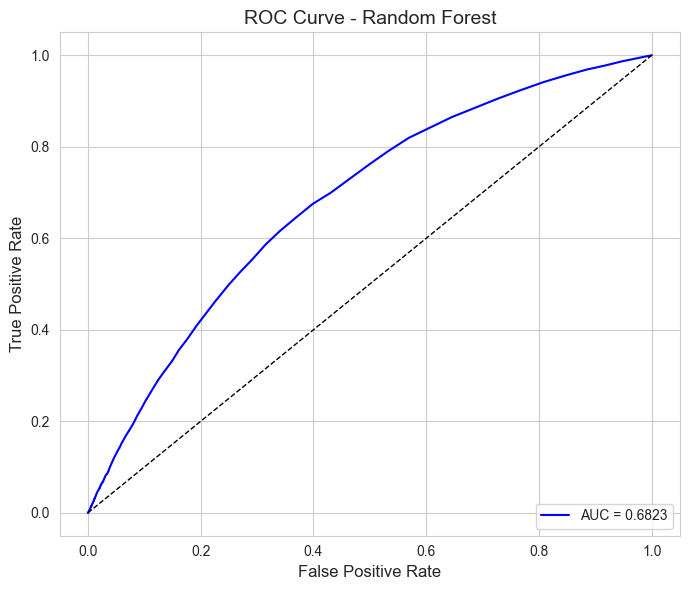

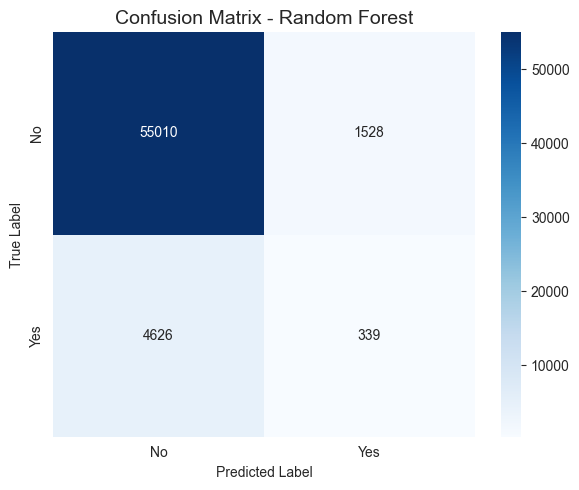

In [138]:
evaluate_classification_model(y_test, y_pred_rf, y_proba_rf, model_name="Random Forest")


In [139]:
evaluate_and_store_model(y_test, y_pred_rf, y_proba_rf, model_name="Random Forest")


In [140]:
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=(len(y_train_resampled) - sum(y_train_resampled)) / sum(y_train_resampled),  # For class imbalance
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_scaled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [141]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)


 Evaluation Metrics for XGBoost:

 Accuracy      : 0.9090
 Precision     : 0.2606
 Recall        : 0.0691
 F1 Score      : 0.1092
 ROC-AUC Score : 0.7051

 Confusion Matrix:
[[55565   973]
 [ 4622   343]]

 Classification Report:
              precision    recall  f1-score   support

           0     0.9232    0.9828    0.9521     56538
           1     0.2606    0.0691    0.1092      4965

    accuracy                         0.9090     61503
   macro avg     0.5919    0.5259    0.5306     61503
weighted avg     0.8697    0.9090    0.8840     61503



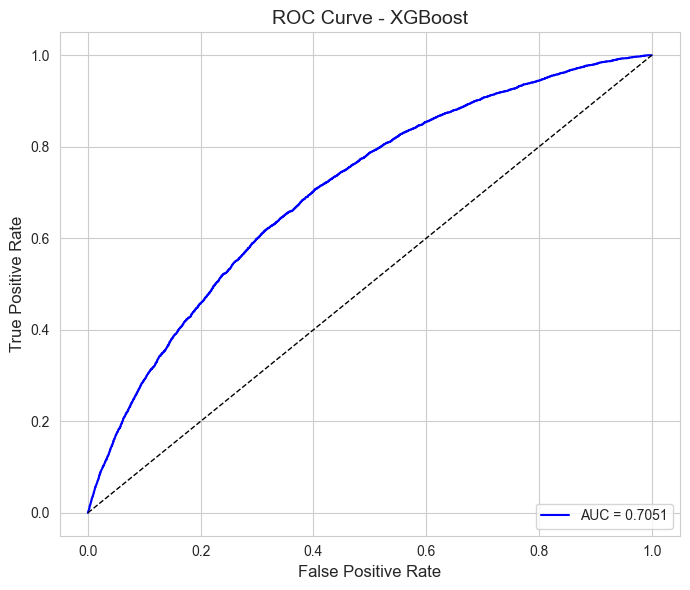

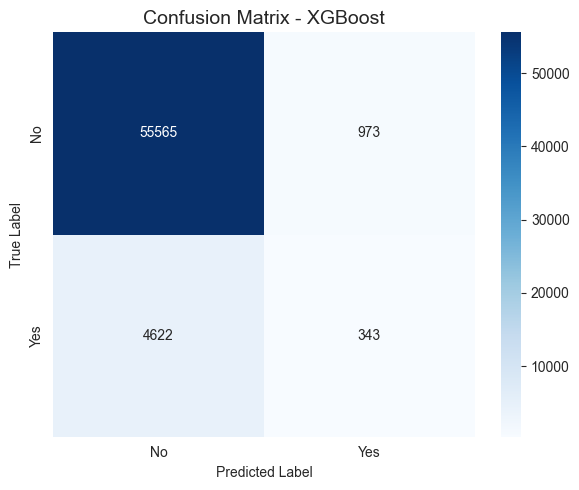

In [142]:
evaluate_classification_model(y_test, y_pred_xgb, y_proba_xgb, model_name="XGBoost")
evaluate_and_store_model(y_test, y_pred_xgb, y_proba_xgb, model_name="XGBoost")


In [143]:
results_df = pd.DataFrame(model_results)
results_df.sort_values(by="F1 Score", ascending=False)


Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.857909   0.187893  0.228802  0.206339  0.654984
2        Decision Tree  0.781913   0.128692  0.294864  0.179181  0.639954
1       MLP Classifier  0.882770   0.187064  0.135146  0.156922  0.661919
4              XGBoost  0.909029   0.260638  0.069084  0.109218  0.705100
3        Random Forest  0.899940   0.181575  0.068278  0.099239  0.682324

In [144]:
knn = KNeighborsClassifier(
    n_neighbors=5,      # You can try 3, 5, 7, etc.
    weights='uniform',  # or 'distance'
    n_jobs=-1           # Use all cores
)

knn.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier(n_jobs=-1)

In [145]:
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)


 Evaluation Metrics for K-Nearest Neighbors:

 Accuracy      : 0.7279
 Precision     : 0.1123
 Recall        : 0.3432
 F1 Score      : 0.1692
 ROC-AUC Score : 0.5873

 Confusion Matrix:
[[43062 13476]
 [ 3261  1704]]

 Classification Report:
              precision    recall  f1-score   support

           0     0.9296    0.7616    0.8373     56538
           1     0.1123    0.3432    0.1692      4965

    accuracy                         0.7279     61503
   macro avg     0.5209    0.5524    0.5032     61503
weighted avg     0.8636    0.7279    0.7834     61503



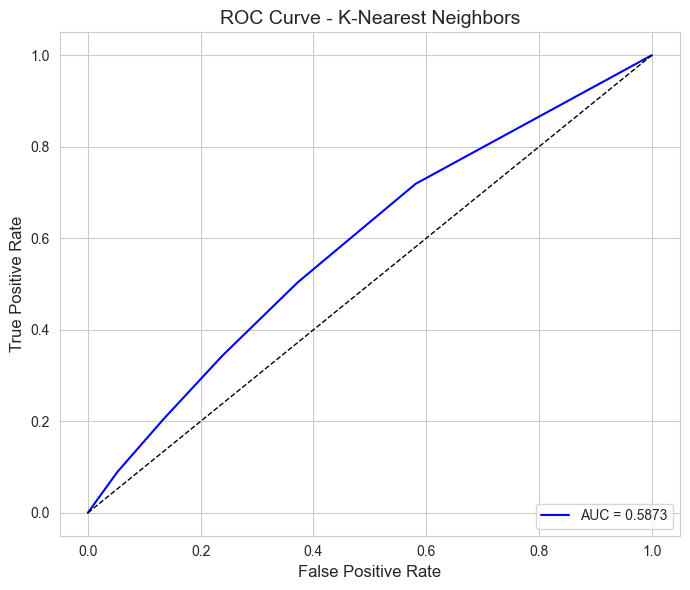

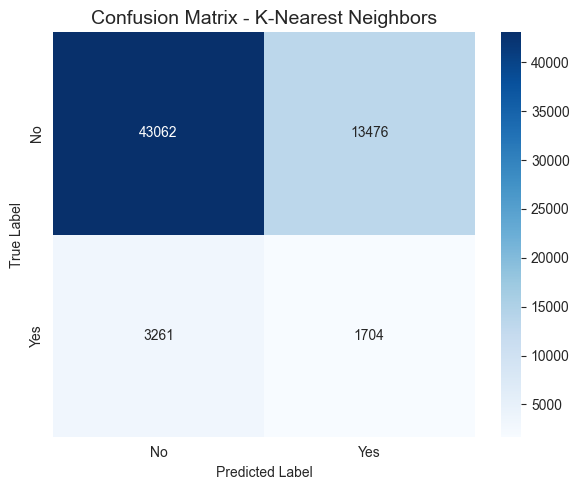

In [146]:
evaluate_classification_model(y_test, y_pred_knn, y_proba_knn, model_name="K-Nearest Neighbors")
evaluate_and_store_model(y_test, y_pred_knn, y_proba_knn, model_name="K-Nearest Neighbors")


In [147]:
results_df = pd.DataFrame(model_results)
results_df.sort_values(by="F1 Score", ascending=False)


Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.857909   0.187893  0.228802  0.206339  0.654984
2        Decision Tree  0.781913   0.128692  0.294864  0.179181  0.639954
5  K-Nearest Neighbors  0.727867   0.112253  0.343202  0.169173  0.587325
1       MLP Classifier  0.882770   0.187064  0.135146  0.156922  0.661919
4              XGBoost  0.909029   0.260638  0.069084  0.109218  0.705100
3        Random Forest  0.899940   0.181575  0.068278  0.099239  0.682324

In [148]:
from lightgbm import LGBMClassifier
lgb_model = LGBMClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    class_weight='balanced',  # Automatically handles imbalance
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(X_train_resampled, y_train_resampled)  # Or use scaled version


[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6509
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', max_depth=6, n_estimators=200,
               n_jobs=-1, random_state=42)

In [149]:
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)

 Evaluation Metrics for LightGBM:

 Accuracy      : 0.9103
 Precision     : 0.2676
 Recall        : 0.0636
 F1 Score      : 0.1028
 ROC-AUC Score : 0.7071

 Confusion Matrix:
[[55673   865]
 [ 4649   316]]

 Classification Report:
              precision    recall  f1-score   support

           0     0.9229    0.9847    0.9528     56538
           1     0.2676    0.0636    0.1028      4965

    accuracy                         0.9103     61503
   macro avg     0.5953    0.5242    0.5278     61503
weighted avg     0.8700    0.9103    0.8842     61503



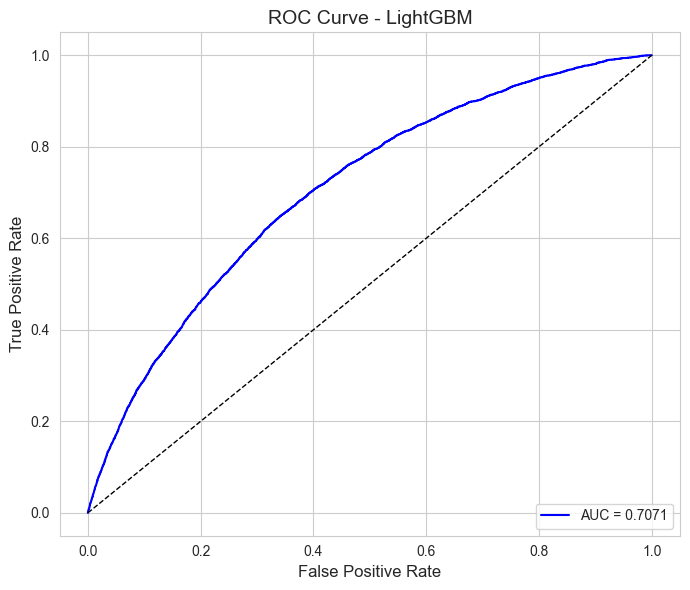

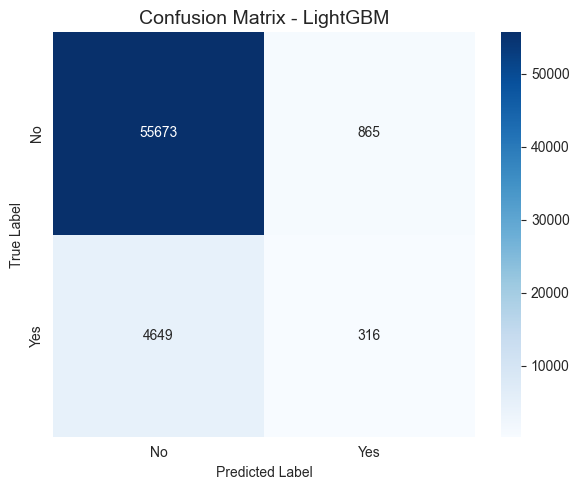

In [150]:
evaluate_classification_model(y_test, y_pred_lgb, y_proba_lgb, model_name="LightGBM")
evaluate_and_store_model(y_test, y_pred_lgb, y_proba_lgb, model_name="LightGBM")


In [151]:
results_df = pd.DataFrame(model_results)
results_df.sort_values(by="F1 Score", ascending=False)


Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.857909   0.187893  0.228802  0.206339  0.654984
2        Decision Tree  0.781913   0.128692  0.294864  0.179181  0.639954
5  K-Nearest Neighbors  0.727867   0.112253  0.343202  0.169173  0.587325
1       MLP Classifier  0.882770   0.187064  0.135146  0.156922  0.661919
4              XGBoost  0.909029   0.260638  0.069084  0.109218  0.705100
6             LightGBM  0.910346   0.267570  0.063646  0.102831  0.707112
3        Random Forest  0.899940   0.181575  0.068278  0.099239  0.682324

# Best Model Recommendation: LightGBM
Reasons:
- Highest Accuracy: 91.03%
- Highest ROC-AUC: 0.7071 → Indicates strong discrimination ability between classes.
- Better Precision compared to others: Helps when false positives are costly.
- Faster Inference Time and Lower Resource Usage than XGBoost and Random Forest → Good for deployment.

In [152]:
import pickle
# Save the model to a file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)


In [153]:
# Load the model from the file
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [172]:
loaded_model.predict(X_test.iloc[[1]])  



array([0], dtype=int64)

In [174]:
y_test.iloc[[1]]

138039    0
Name: TARGET, dtype: int64

# Challenges Faced
1. Data Quality Issues
-	Missing values in critical columns like employment duration and income.
 -	Addressed using statistical imputations and careful feature dropping.
2. Dataset Size and Memory Constraints
-	Merging auxiliary datasets increased memory usage significantly.
 -	Resolved by chunk processing and aggregations before merge.
3. Target Imbalance
-	With only 8% positive class, models struggled to learn minority patterns.
 -	Solved using class weighting and ROC-AUC for evaluation.
4. Feature Correlation and Redundancy
-	High correlation among derived features led to overfitting.
 -	Applied PCA and correlation-based feature selection to reduce redundancy.



# Conclusion
This project demonstrates a complete end-to-end machine learning workflow:
- Comprehensive data cleaning and feature engineering
- Smart handling of large and messy auxiliary datasets
-	Informed model selection based on metrics (not just accuracy)
-	Use of both simple (Logistic) and advanced (LightGBM) models

#### Outcome: LightGBM provided the best overall ROC-AUC, while Logistic Regression gave interpretable and balanced results.
This solution can be deployed as a credit scoring engine for pre-screening applicants in real-time to reduce loan default risk.
